In [1]:

import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import copy

In [8]:
from crowd_nav.imitate import *
from crowd_nav.utils.multi_envs import modify_env_params
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
output_dir = '../data/multi_env/imitate-trajpred-2.50-weight-1to4-length-traj'
df = torch.load(os.path.join(output_dir, 'results.csv'))

In [18]:
df_filters = df[df['neighbor_dist'] > 9]

In [19]:
df_filters.shape

(472, 4)

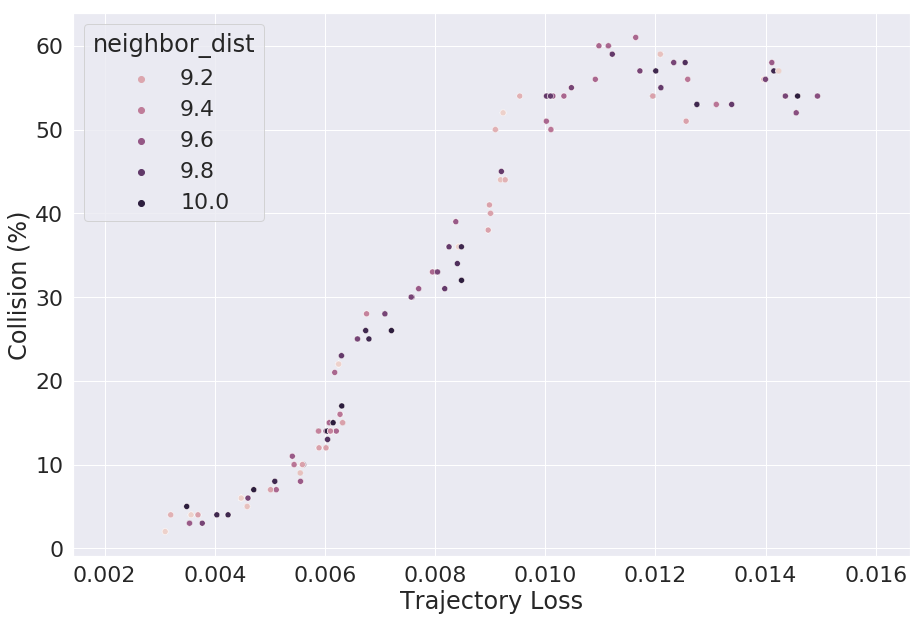

In [20]:
sns.set_style("darkgrid")

plot = sns.scatterplot(
data=df_filters,
x="trajectory_loss", y="collision", hue='neighbor_dist'
)
plot.set(xlabel='Trajectory Loss', ylabel='Collision (%)')
fig = plot.get_figure()
fig.set_size_inches(15, 10)

In [13]:
sns.set_style("darkgrid")

plot = sns.scatterplot(
data=df,
x="trajectory_loss", y="collision", hue='safety_space'
)
plot.set(xlabel='Trajectory Loss', ylabel='Collision (%)')
fig = plot.get_figure()
fig.set_size_inches(15, 10)

In [4]:
from crowd_nav.multi_env.correlation import plot_figs

In [6]:
plot_figs(df, output_dir)

In [3]:
model_path = 'data/full_data_tests/trajpred/imitate-trajpred-2.50-weight-1to4-length-traj/policy_net_129.pth'
traj_path = 'data/full_data_tests/trajpred/imitate-trajpred-2.50-weight-1to4-length-traj/prediction_head_129.pth'

## Outlier detection

In [9]:
env_mods = {'safety_space' : 0.03, 
            'time_horizon' : 1}
test_model(m_p=model_path, model_type='sail_traj_simple', visible=False, n_episodes=200,\
           env_type='orca', traj_path=traj_path, env_mods=env_mods)

success: 0.8750,collision: 0.1250,nav time: 10.44,reward: 0.2828, timeout : 0.0000, traj accuracy : 0.0106


{'success': 0.875,
 'collision': 0.125,
 'nav time': 10.441428571428572,
 'reward': 0.2828338668203915,
 'traj accuracy': 0.010607808514030705}

In [7]:
test_grid_orca = {'safety_space' : np.linspace(0.01, 1, 100), 'neighbor_dist' : np.linspace(0, 6, 30), 
             'time_horizon' : np.linspace(0, 10, 10)}

In [7]:
import random

In [10]:
n_tests=2000
results = []
iterator = tqdm_notebook(range(n_tests), desc='Testing')
for i in  iterator:
    if i % 100 == 0 :
        torch.save(results, 'data/outlier/results.pth')
    env_mods = {'safety_space' : random.choice(np.linspace(0.01, 0.8, 100)), 
                'neighbor_dist': random.choice(np.linspace(0, 6, 30)),
                'time_horizon' : random.choice(np.linspace(0, 10, 10))}
    
    results.append((env_mods, test_model(m_p=model_path, model_type='sail_traj_simple', visible=False, n_episodes=100,\
           env_type='orca', traj_path=traj_path, env_mods=env_mods)))
    

KeyboardInterrupt: 

In [33]:
results_sf = []
n_tests=500
iterator = tqdm_notebook(range(n_tests), desc='Testing')
for i in  iterator:
    if i % 100 == 0 :
        torch.save(results_sf, 'data/outlier/results_sf.pth')
    env_mods = {'v0' : random.choice(np.linspace(0.01, 5, 100)), 
                'sigma': random.choice(np.linspace(0.01, 1, 100))}
    
    results_sf.append((env_mods, test_model(m_p=model_path, model_type='sail_traj_simple', visible=False, n_episodes=100,\
           env_type='socialforce', traj_path=traj_path, env_mods=env_mods)))
    

success: 0.90, collision: 0.10, nav time: 10.82, reward: 0.2834 +- 0.1399, traj accuracy : 0.0111


success: 0.86, collision: 0.14, nav time: 11.04, reward: 0.2612 +- 0.1534, traj accuracy : 0.0099


success: 0.94, collision: 0.05, nav time: 10.55, reward: 0.3072 +- 0.1141, traj accuracy : 0.0080


success: 0.89, collision: 0.11, nav time: 11.54, reward: 0.2551 +- 0.1461, traj accuracy : 0.0071


success: 0.91, collision: 0.09, nav time: 11.72, reward: 0.2609 +- 0.1304, traj accuracy : 0.0134


success: 0.93, collision: 0.07, nav time: 11.56, reward: 0.2774 +- 0.1226, traj accuracy : 0.0147


success: 0.93, collision: 0.07, nav time: 10.54, reward: 0.3022 +- 0.1269, traj accuracy : 0.0082


success: 0.84, collision: 0.15, nav time: 11.60, reward: 0.2402 +- 0.1574, traj accuracy : 0.0117


success: 0.87, collision: 0.13, nav time: 11.02, reward: 0.2632 +- 0.1484, traj accuracy : 0.0109


success: 0.92, collision: 0.07, nav time: 10.81, reward: 0.2903 +- 0.1260, traj accuracy : 0.0078


success: 0.86, collision: 0.11, nav time: 11.35, reward: 0.2549 +- 0.1515, traj accuracy : 0.0175


success: 0.91, collision: 0.09, nav time: 11.42, reward: 0.2683 +- 0.1309, traj accuracy : 0.0104


success: 0.91, collision: 0.09, nav time: 11.55, reward: 0.2659 +- 0.1283, traj accuracy : 0.0126


success: 0.92, collision: 0.07, nav time: 11.38, reward: 0.2766 +- 0.1208, traj accuracy : 0.0101


success: 0.90, collision: 0.09, nav time: 11.35, reward: 0.2691 +- 0.1346, traj accuracy : 0.0310


success: 0.87, collision: 0.13, nav time: 11.73, reward: 0.2450 +- 0.1477, traj accuracy : 0.0105


success: 0.96, collision: 0.04, nav time: 10.91, reward: 0.3058 +- 0.0925, traj accuracy : 0.0066


success: 0.92, collision: 0.08, nav time: 11.51, reward: 0.2711 +- 0.1263, traj accuracy : 0.0107


success: 0.97, collision: 0.03, nav time: 10.26, reward: 0.3282 +- 0.0894, traj accuracy : 0.0082


success: 0.95, collision: 0.05, nav time: 10.89, reward: 0.3005 +- 0.1155, traj accuracy : 0.0107


success: 0.93, collision: 0.07, nav time: 10.80, reward: 0.2970 +- 0.1219, traj accuracy : 0.0251


success: 0.89, collision: 0.11, nav time: 10.70, reward: 0.2817 +- 0.1455, traj accuracy : 0.0315


success: 0.86, collision: 0.14, nav time: 12.00, reward: 0.2345 +- 0.1474, traj accuracy : 0.0088


success: 0.94, collision: 0.06, nav time: 11.29, reward: 0.2895 +- 0.1146, traj accuracy : 0.0096


success: 0.86, collision: 0.14, nav time: 12.71, reward: 0.2171 +- 0.1480, traj accuracy : 0.0088


success: 0.88, collision: 0.12, nav time: 11.78, reward: 0.2473 +- 0.1441, traj accuracy : 0.0074


success: 0.99, collision: 0.01, nav time: 10.47, reward: 0.3290 +- 0.0611, traj accuracy : 0.0033


success: 0.95, collision: 0.05, nav time: 10.74, reward: 0.3049 +- 0.1038, traj accuracy : 0.0061


success: 0.92, collision: 0.08, nav time: 10.92, reward: 0.2886 +- 0.1250, traj accuracy : 0.0089


success: 0.97, collision: 0.03, nav time: 10.53, reward: 0.3184 +- 0.0868, traj accuracy : 0.0094


success: 0.91, collision: 0.09, nav time: 11.16, reward: 0.2769 +- 0.1306, traj accuracy : 0.0155


success: 0.92, collision: 0.08, nav time: 11.26, reward: 0.2791 +- 0.1284, traj accuracy : 0.0105


success: 0.90, collision: 0.10, nav time: 10.95, reward: 0.2773 +- 0.1395, traj accuracy : 0.0105


success: 0.94, collision: 0.06, nav time: 11.37, reward: 0.2823 +- 0.1129, traj accuracy : 0.0104


success: 0.90, collision: 0.10, nav time: 11.03, reward: 0.2770 +- 0.1379, traj accuracy : 0.0071


success: 0.85, collision: 0.14, nav time: 11.47, reward: 0.2446 +- 0.1504, traj accuracy : 0.0096


success: 0.97, collision: 0.03, nav time: 11.53, reward: 0.2911 +- 0.0886, traj accuracy : 0.0135


success: 0.92, collision: 0.08, nav time: 11.42, reward: 0.2747 +- 0.1216, traj accuracy : 0.0077


success: 0.94, collision: 0.06, nav time: 10.72, reward: 0.2997 +- 0.1127, traj accuracy : 0.0071


success: 0.92, collision: 0.08, nav time: 10.81, reward: 0.2880 +- 0.1279, traj accuracy : 0.0085


success: 0.98, collision: 0.02, nav time: 10.71, reward: 0.3214 +- 0.0766, traj accuracy : 0.0043


success: 0.91, collision: 0.08, nav time: 10.99, reward: 0.2830 +- 0.1299, traj accuracy : 0.0152


success: 0.92, collision: 0.08, nav time: 11.93, reward: 0.2592 +- 0.1257, traj accuracy : 0.0131


success: 0.92, collision: 0.08, nav time: 10.74, reward: 0.2923 +- 0.1306, traj accuracy : 0.0244


success: 0.94, collision: 0.06, nav time: 11.20, reward: 0.2881 +- 0.1195, traj accuracy : 0.0104


success: 0.89, collision: 0.10, nav time: 11.89, reward: 0.2508 +- 0.1404, traj accuracy : 0.0122


success: 0.94, collision: 0.06, nav time: 10.98, reward: 0.2950 +- 0.1129, traj accuracy : 0.0107


success: 0.94, collision: 0.06, nav time: 11.16, reward: 0.2887 +- 0.1122, traj accuracy : 0.0139


success: 0.85, collision: 0.15, nav time: 12.33, reward: 0.2179 +- 0.1545, traj accuracy : 0.0099


success: 0.90, collision: 0.10, nav time: 11.02, reward: 0.2756 +- 0.1406, traj accuracy : 0.0086


success: 0.94, collision: 0.06, nav time: 10.38, reward: 0.3102 +- 0.1169, traj accuracy : 0.0227


success: 0.93, collision: 0.07, nav time: 12.00, reward: 0.2617 +- 0.1184, traj accuracy : 0.0110


success: 0.92, collision: 0.08, nav time: 12.03, reward: 0.2574 +- 0.1268, traj accuracy : 0.0126


success: 0.87, collision: 0.13, nav time: 11.40, reward: 0.2514 +- 0.1509, traj accuracy : 0.0083


success: 0.95, collision: 0.05, nav time: 10.88, reward: 0.3026 +- 0.1077, traj accuracy : 0.0091


success: 0.92, collision: 0.08, nav time: 11.03, reward: 0.2838 +- 0.1291, traj accuracy : 0.0280


success: 0.94, collision: 0.06, nav time: 11.18, reward: 0.2886 +- 0.1099, traj accuracy : 0.0128


success: 0.91, collision: 0.08, nav time: 11.71, reward: 0.2647 +- 0.1253, traj accuracy : 0.0098


success: 0.91, collision: 0.08, nav time: 11.77, reward: 0.2611 +- 0.1244, traj accuracy : 0.0088


success: 0.99, collision: 0.01, nav time: 10.45, reward: 0.3310 +- 0.0617, traj accuracy : 0.0058


success: 0.90, collision: 0.10, nav time: 11.03, reward: 0.2730 +- 0.1417, traj accuracy : 0.0165


success: 0.92, collision: 0.08, nav time: 11.24, reward: 0.2781 +- 0.1238, traj accuracy : 0.0124


success: 0.96, collision: 0.04, nav time: 10.30, reward: 0.3188 +- 0.0997, traj accuracy : 0.0039


success: 0.95, collision: 0.05, nav time: 10.60, reward: 0.3114 +- 0.1071, traj accuracy : 0.0041


success: 0.97, collision: 0.03, nav time: 11.09, reward: 0.3056 +- 0.0962, traj accuracy : 0.0116


success: 0.92, collision: 0.08, nav time: 10.95, reward: 0.2877 +- 0.1294, traj accuracy : 0.0083


success: 0.95, collision: 0.05, nav time: 10.62, reward: 0.3096 +- 0.1053, traj accuracy : 0.0060


success: 0.90, collision: 0.10, nav time: 10.63, reward: 0.2851 +- 0.1479, traj accuracy : 0.0361


success: 0.93, collision: 0.07, nav time: 11.37, reward: 0.2791 +- 0.1201, traj accuracy : 0.0114


success: 0.98, collision: 0.02, nav time: 10.16, reward: 0.3366 +- 0.0792, traj accuracy : 0.0054


success: 0.98, collision: 0.02, nav time: 10.31, reward: 0.3303 +- 0.0777, traj accuracy : 0.0064


success: 0.93, collision: 0.07, nav time: 10.75, reward: 0.2960 +- 0.1213, traj accuracy : 0.0147


success: 0.86, collision: 0.14, nav time: 11.19, reward: 0.2573 +- 0.1571, traj accuracy : 0.0206


success: 0.91, collision: 0.09, nav time: 10.98, reward: 0.2789 +- 0.1362, traj accuracy : 0.0326


success: 0.85, collision: 0.15, nav time: 11.48, reward: 0.2442 +- 0.1524, traj accuracy : 0.0082


success: 0.94, collision: 0.06, nav time: 11.62, reward: 0.2777 +- 0.1122, traj accuracy : 0.0073


success: 0.97, collision: 0.03, nav time: 11.32, reward: 0.2964 +- 0.0899, traj accuracy : 0.0061


success: 0.86, collision: 0.14, nav time: 11.45, reward: 0.2471 +- 0.1557, traj accuracy : 0.0070


success: 0.92, collision: 0.07, nav time: 10.96, reward: 0.2885 +- 0.1256, traj accuracy : 0.0103


success: 0.98, collision: 0.02, nav time: 10.93, reward: 0.3126 +- 0.0755, traj accuracy : 0.0102


success: 0.98, collision: 0.02, nav time: 11.28, reward: 0.3024 +- 0.0795, traj accuracy : 0.0068


success: 0.88, collision: 0.12, nav time: 11.26, reward: 0.2607 +- 0.1470, traj accuracy : 0.0122


success: 0.90, collision: 0.10, nav time: 11.45, reward: 0.2668 +- 0.1312, traj accuracy : 0.0099


success: 1.00, collision: 0.00, nav time: 10.52, reward: 0.3347 +- 0.0427, traj accuracy : 0.0063


success: 0.95, collision: 0.05, nav time: 10.55, reward: 0.3122 +- 0.1100, traj accuracy : 0.0082


success: 0.85, collision: 0.15, nav time: 11.93, reward: 0.2337 +- 0.1498, traj accuracy : 0.0082


success: 0.91, collision: 0.09, nav time: 10.80, reward: 0.2857 +- 0.1367, traj accuracy : 0.0322


success: 0.92, collision: 0.08, nav time: 11.73, reward: 0.2671 +- 0.1212, traj accuracy : 0.0073


success: 0.90, collision: 0.10, nav time: 11.15, reward: 0.2744 +- 0.1359, traj accuracy : 0.0120


success: 0.89, collision: 0.11, nav time: 10.72, reward: 0.2775 +- 0.1527, traj accuracy : 0.0050


success: 0.94, collision: 0.06, nav time: 11.20, reward: 0.2890 +- 0.1158, traj accuracy : 0.0085


success: 0.98, collision: 0.02, nav time: 10.83, reward: 0.3173 +- 0.0779, traj accuracy : 0.0134


success: 0.88, collision: 0.12, nav time: 10.92, reward: 0.2727 +- 0.1481, traj accuracy : 0.0115


success: 0.94, collision: 0.06, nav time: 10.74, reward: 0.2998 +- 0.1188, traj accuracy : 0.0171


success: 0.92, collision: 0.08, nav time: 11.47, reward: 0.2731 +- 0.1234, traj accuracy : 0.0071


success: 0.92, collision: 0.07, nav time: 11.61, reward: 0.2710 +- 0.1210, traj accuracy : 0.0097


success: 0.88, collision: 0.11, nav time: 11.58, reward: 0.2567 +- 0.1429, traj accuracy : 0.0095


success: 0.92, collision: 0.07, nav time: 11.32, reward: 0.2773 +- 0.1219, traj accuracy : 0.0109


success: 0.85, collision: 0.14, nav time: 11.40, reward: 0.2503 +- 0.1577, traj accuracy : 0.0094


success: 0.84, collision: 0.15, nav time: 11.76, reward: 0.2348 +- 0.1573, traj accuracy : 0.0078


success: 0.90, collision: 0.10, nav time: 11.78, reward: 0.2583 +- 0.1350, traj accuracy : 0.0120


success: 0.88, collision: 0.12, nav time: 11.55, reward: 0.2544 +- 0.1429, traj accuracy : 0.0078


success: 0.88, collision: 0.12, nav time: 11.96, reward: 0.2436 +- 0.1391, traj accuracy : 0.0098


success: 0.84, collision: 0.12, nav time: 11.27, reward: 0.2481 +- 0.1523, traj accuracy : 0.0118


success: 0.92, collision: 0.07, nav time: 11.61, reward: 0.2703 +- 0.1215, traj accuracy : 0.0136


success: 0.92, collision: 0.08, nav time: 11.45, reward: 0.2722 +- 0.1289, traj accuracy : 0.0090


success: 0.93, collision: 0.07, nav time: 11.07, reward: 0.2864 +- 0.1210, traj accuracy : 0.0129


success: 0.98, collision: 0.02, nav time: 10.54, reward: 0.3257 +- 0.0770, traj accuracy : 0.0040


success: 0.91, collision: 0.09, nav time: 11.73, reward: 0.2624 +- 0.1300, traj accuracy : 0.0107


success: 0.90, collision: 0.10, nav time: 11.51, reward: 0.2611 +- 0.1421, traj accuracy : 0.0080


success: 0.86, collision: 0.13, nav time: 11.23, reward: 0.2537 +- 0.1525, traj accuracy : 0.0114


success: 0.93, collision: 0.07, nav time: 11.48, reward: 0.2756 +- 0.1223, traj accuracy : 0.0116


success: 0.95, collision: 0.05, nav time: 10.87, reward: 0.3023 +- 0.1075, traj accuracy : 0.0161


success: 0.92, collision: 0.07, nav time: 11.68, reward: 0.2668 +- 0.1240, traj accuracy : 0.0086


success: 0.92, collision: 0.08, nav time: 11.80, reward: 0.2620 +- 0.1231, traj accuracy : 0.0075


success: 0.96, collision: 0.04, nav time: 10.55, reward: 0.3145 +- 0.0974, traj accuracy : 0.0095


success: 0.81, collision: 0.18, nav time: 12.03, reward: 0.2147 +- 0.1616, traj accuracy : 0.0098


success: 0.97, collision: 0.03, nav time: 10.26, reward: 0.3252 +- 0.0899, traj accuracy : 0.0071


success: 0.92, collision: 0.08, nav time: 11.28, reward: 0.2789 +- 0.1264, traj accuracy : 0.0106


success: 0.89, collision: 0.11, nav time: 12.32, reward: 0.2361 +- 0.1334, traj accuracy : 0.0105


success: 0.96, collision: 0.04, nav time: 10.22, reward: 0.3226 +- 0.1023, traj accuracy : 0.0078


success: 0.95, collision: 0.05, nav time: 10.32, reward: 0.3158 +- 0.1085, traj accuracy : 0.0055


success: 0.90, collision: 0.10, nav time: 11.10, reward: 0.2766 +- 0.1402, traj accuracy : 0.0127


success: 0.87, collision: 0.13, nav time: 11.16, reward: 0.2596 +- 0.1529, traj accuracy : 0.0096


success: 0.97, collision: 0.03, nav time: 11.03, reward: 0.3046 +- 0.0870, traj accuracy : 0.0072


success: 0.89, collision: 0.11, nav time: 11.13, reward: 0.2677 +- 0.1436, traj accuracy : 0.0121


success: 0.97, collision: 0.03, nav time: 10.70, reward: 0.3170 +- 0.0879, traj accuracy : 0.0094


success: 0.92, collision: 0.07, nav time: 11.25, reward: 0.2775 +- 0.1240, traj accuracy : 0.0125


success: 0.93, collision: 0.06, nav time: 11.00, reward: 0.2921 +- 0.1171, traj accuracy : 0.0251


success: 0.90, collision: 0.10, nav time: 10.54, reward: 0.2900 +- 0.1429, traj accuracy : 0.0133


success: 0.85, collision: 0.14, nav time: 11.68, reward: 0.2374 +- 0.1546, traj accuracy : 0.0153


success: 0.91, collision: 0.09, nav time: 10.99, reward: 0.2789 +- 0.1351, traj accuracy : 0.0115


success: 0.86, collision: 0.14, nav time: 11.81, reward: 0.2400 +- 0.1512, traj accuracy : 0.0088


success: 0.93, collision: 0.07, nav time: 12.17, reward: 0.2575 +- 0.1169, traj accuracy : 0.0093


success: 0.99, collision: 0.01, nav time: 10.39, reward: 0.3360 +- 0.0635, traj accuracy : 0.0119


success: 0.94, collision: 0.06, nav time: 10.81, reward: 0.3005 +- 0.1168, traj accuracy : 0.0163


success: 0.87, collision: 0.12, nav time: 11.08, reward: 0.2645 +- 0.1583, traj accuracy : 0.0128


success: 0.89, collision: 0.10, nav time: 10.93, reward: 0.2761 +- 0.1443, traj accuracy : 0.0082


success: 0.94, collision: 0.06, nav time: 10.80, reward: 0.2982 +- 0.1166, traj accuracy : 0.0182


success: 0.83, collision: 0.17, nav time: 11.92, reward: 0.2245 +- 0.1642, traj accuracy : 0.0107


success: 0.96, collision: 0.04, nav time: 11.83, reward: 0.2776 +- 0.1000, traj accuracy : 0.0098


success: 0.93, collision: 0.07, nav time: 11.27, reward: 0.2836 +- 0.1216, traj accuracy : 0.0116


success: 0.89, collision: 0.11, nav time: 11.42, reward: 0.2596 +- 0.1378, traj accuracy : 0.0115


success: 0.98, collision: 0.02, nav time: 10.64, reward: 0.3213 +- 0.0773, traj accuracy : 0.0065


success: 0.93, collision: 0.07, nav time: 11.86, reward: 0.2670 +- 0.1160, traj accuracy : 0.0098


success: 0.88, collision: 0.12, nav time: 11.41, reward: 0.2606 +- 0.1423, traj accuracy : 0.0105


success: 0.86, collision: 0.14, nav time: 11.66, reward: 0.2436 +- 0.1512, traj accuracy : 0.0091


success: 0.85, collision: 0.15, nav time: 11.46, reward: 0.2429 +- 0.1571, traj accuracy : 0.0107


success: 0.87, collision: 0.13, nav time: 11.61, reward: 0.2478 +- 0.1443, traj accuracy : 0.0084


success: 0.99, collision: 0.01, nav time: 10.54, reward: 0.3290 +- 0.0590, traj accuracy : 0.0060


success: 0.92, collision: 0.08, nav time: 11.01, reward: 0.2874 +- 0.1305, traj accuracy : 0.0103


success: 0.95, collision: 0.05, nav time: 11.23, reward: 0.2924 +- 0.1064, traj accuracy : 0.0045


success: 0.92, collision: 0.08, nav time: 11.50, reward: 0.2708 +- 0.1252, traj accuracy : 0.0101


success: 0.85, collision: 0.14, nav time: 11.27, reward: 0.2511 +- 0.1532, traj accuracy : 0.0097


success: 0.93, collision: 0.06, nav time: 11.15, reward: 0.2864 +- 0.1161, traj accuracy : 0.0105


success: 0.93, collision: 0.07, nav time: 10.84, reward: 0.2940 +- 0.1232, traj accuracy : 0.0110


success: 0.89, collision: 0.11, nav time: 10.92, reward: 0.2731 +- 0.1502, traj accuracy : 0.0385


success: 0.88, collision: 0.12, nav time: 11.20, reward: 0.2614 +- 0.1460, traj accuracy : 0.0088


success: 0.91, collision: 0.09, nav time: 11.09, reward: 0.2800 +- 0.1255, traj accuracy : 0.0079


success: 0.98, collision: 0.02, nav time: 10.51, reward: 0.3244 +- 0.0736, traj accuracy : 0.0043


success: 0.89, collision: 0.11, nav time: 11.78, reward: 0.2520 +- 0.1407, traj accuracy : 0.0101


success: 0.93, collision: 0.06, nav time: 11.44, reward: 0.2792 +- 0.1178, traj accuracy : 0.0142


success: 0.96, collision: 0.04, nav time: 10.41, reward: 0.3182 +- 0.1000, traj accuracy : 0.0079


success: 0.91, collision: 0.09, nav time: 11.58, reward: 0.2666 +- 0.1294, traj accuracy : 0.0097


success: 0.93, collision: 0.07, nav time: 11.89, reward: 0.2659 +- 0.1173, traj accuracy : 0.0110


success: 0.89, collision: 0.11, nav time: 11.41, reward: 0.2631 +- 0.1441, traj accuracy : 0.0128


success: 0.90, collision: 0.10, nav time: 12.19, reward: 0.2442 +- 0.1363, traj accuracy : 0.0074


success: 0.85, collision: 0.15, nav time: 12.21, reward: 0.2222 +- 0.1499, traj accuracy : 0.0071


success: 0.92, collision: 0.08, nav time: 11.80, reward: 0.2645 +- 0.1216, traj accuracy : 0.0094


success: 0.92, collision: 0.08, nav time: 11.43, reward: 0.2718 +- 0.1234, traj accuracy : 0.0113


success: 0.88, collision: 0.12, nav time: 11.45, reward: 0.2554 +- 0.1431, traj accuracy : 0.0066


success: 0.91, collision: 0.09, nav time: 10.71, reward: 0.2881 +- 0.1393, traj accuracy : 0.0367


success: 0.89, collision: 0.11, nav time: 11.01, reward: 0.2742 +- 0.1441, traj accuracy : 0.0090


success: 0.89, collision: 0.11, nav time: 11.02, reward: 0.2734 +- 0.1438, traj accuracy : 0.0156


success: 0.91, collision: 0.08, nav time: 11.61, reward: 0.2672 +- 0.1282, traj accuracy : 0.0150


success: 0.94, collision: 0.06, nav time: 11.69, reward: 0.2774 +- 0.1142, traj accuracy : 0.0117


success: 0.97, collision: 0.03, nav time: 10.65, reward: 0.3171 +- 0.0887, traj accuracy : 0.0070


success: 0.95, collision: 0.05, nav time: 10.31, reward: 0.3137 +- 0.1093, traj accuracy : 0.0070


success: 0.91, collision: 0.09, nav time: 11.18, reward: 0.2778 +- 0.1328, traj accuracy : 0.0094


success: 0.92, collision: 0.08, nav time: 10.91, reward: 0.2853 +- 0.1231, traj accuracy : 0.0066


success: 0.93, collision: 0.07, nav time: 11.62, reward: 0.2721 +- 0.1167, traj accuracy : 0.0106


success: 0.93, collision: 0.07, nav time: 11.70, reward: 0.2708 +- 0.1170, traj accuracy : 0.0125


success: 0.89, collision: 0.11, nav time: 11.52, reward: 0.2555 +- 0.1448, traj accuracy : 0.0086


success: 0.92, collision: 0.08, nav time: 11.05, reward: 0.2853 +- 0.1284, traj accuracy : 0.0095


success: 0.95, collision: 0.05, nav time: 11.44, reward: 0.2868 +- 0.1018, traj accuracy : 0.0092


success: 0.89, collision: 0.11, nav time: 11.97, reward: 0.2464 +- 0.1387, traj accuracy : 0.0114


success: 0.82, collision: 0.18, nav time: 11.64, reward: 0.2310 +- 0.1599, traj accuracy : 0.0098


success: 0.94, collision: 0.06, nav time: 12.20, reward: 0.2642 +- 0.1152, traj accuracy : 0.0133


success: 0.97, collision: 0.03, nav time: 10.61, reward: 0.3163 +- 0.0897, traj accuracy : 0.0055


success: 0.92, collision: 0.08, nav time: 11.04, reward: 0.2861 +- 0.1235, traj accuracy : 0.0087


success: 0.96, collision: 0.04, nav time: 10.42, reward: 0.3180 +- 0.0997, traj accuracy : 0.0076


success: 0.91, collision: 0.09, nav time: 11.17, reward: 0.2787 +- 0.1309, traj accuracy : 0.0090


success: 0.88, collision: 0.12, nav time: 12.37, reward: 0.2368 +- 0.1405, traj accuracy : 0.0114


success: 0.97, collision: 0.03, nav time: 11.20, reward: 0.3000 +- 0.0848, traj accuracy : 0.0057


success: 0.88, collision: 0.12, nav time: 11.93, reward: 0.2457 +- 0.1418, traj accuracy : 0.0106


success: 0.87, collision: 0.13, nav time: 11.51, reward: 0.2524 +- 0.1444, traj accuracy : 0.0129


success: 0.84, collision: 0.16, nav time: 11.35, reward: 0.2437 +- 0.1633, traj accuracy : 0.0107


success: 0.88, collision: 0.11, nav time: 10.98, reward: 0.2700 +- 0.1460, traj accuracy : 0.0113


success: 0.95, collision: 0.04, nav time: 11.43, reward: 0.2851 +- 0.1029, traj accuracy : 0.0074


success: 0.91, collision: 0.09, nav time: 10.75, reward: 0.2872 +- 0.1348, traj accuracy : 0.0133


success: 0.96, collision: 0.04, nav time: 11.15, reward: 0.2959 +- 0.0954, traj accuracy : 0.0065


success: 0.87, collision: 0.13, nav time: 11.20, reward: 0.2566 +- 0.1511, traj accuracy : 0.0097


success: 0.81, collision: 0.19, nav time: 12.35, reward: 0.2038 +- 0.1601, traj accuracy : 0.0062


success: 0.93, collision: 0.07, nav time: 11.80, reward: 0.2670 +- 0.1205, traj accuracy : 0.0086


success: 0.95, collision: 0.05, nav time: 10.30, reward: 0.3176 +- 0.1089, traj accuracy : 0.0042


success: 0.94, collision: 0.06, nav time: 11.28, reward: 0.2883 +- 0.1165, traj accuracy : 0.0074


success: 0.95, collision: 0.05, nav time: 10.70, reward: 0.3038 +- 0.1119, traj accuracy : 0.0069


success: 0.88, collision: 0.12, nav time: 11.54, reward: 0.2578 +- 0.1440, traj accuracy : 0.0091


success: 0.84, collision: 0.16, nav time: 11.86, reward: 0.2286 +- 0.1565, traj accuracy : 0.0075


success: 0.91, collision: 0.09, nav time: 11.04, reward: 0.2826 +- 0.1362, traj accuracy : 0.0179


success: 0.98, collision: 0.02, nav time: 10.20, reward: 0.3346 +- 0.0736, traj accuracy : 0.0034


success: 0.93, collision: 0.07, nav time: 10.71, reward: 0.2989 +- 0.1247, traj accuracy : 0.0139


success: 0.91, collision: 0.09, nav time: 10.69, reward: 0.2894 +- 0.1330, traj accuracy : 0.0077


success: 0.86, collision: 0.14, nav time: 12.48, reward: 0.2222 +- 0.1487, traj accuracy : 0.0082


success: 0.92, collision: 0.08, nav time: 11.25, reward: 0.2800 +- 0.1324, traj accuracy : 0.0127


success: 0.96, collision: 0.04, nav time: 10.84, reward: 0.3080 +- 0.1041, traj accuracy : 0.0264


success: 0.90, collision: 0.10, nav time: 11.80, reward: 0.2542 +- 0.1354, traj accuracy : 0.0131


success: 0.88, collision: 0.12, nav time: 11.88, reward: 0.2432 +- 0.1397, traj accuracy : 0.0090


success: 0.92, collision: 0.08, nav time: 11.29, reward: 0.2777 +- 0.1246, traj accuracy : 0.0130


success: 0.90, collision: 0.10, nav time: 11.56, reward: 0.2632 +- 0.1361, traj accuracy : 0.0107


success: 0.92, collision: 0.08, nav time: 10.85, reward: 0.2894 +- 0.1283, traj accuracy : 0.0071


success: 0.88, collision: 0.12, nav time: 12.19, reward: 0.2378 +- 0.1456, traj accuracy : 0.0082


success: 0.85, collision: 0.15, nav time: 12.35, reward: 0.2170 +- 0.1551, traj accuracy : 0.0083


success: 0.87, collision: 0.13, nav time: 11.24, reward: 0.2578 +- 0.1484, traj accuracy : 0.0127


success: 0.87, collision: 0.13, nav time: 11.69, reward: 0.2427 +- 0.1512, traj accuracy : 0.0079


success: 0.96, collision: 0.04, nav time: 10.26, reward: 0.3214 +- 0.0979, traj accuracy : 0.0035


success: 0.96, collision: 0.04, nav time: 10.61, reward: 0.3130 +- 0.0968, traj accuracy : 0.0058


success: 0.94, collision: 0.06, nav time: 11.05, reward: 0.2939 +- 0.1116, traj accuracy : 0.0056


success: 0.93, collision: 0.07, nav time: 11.77, reward: 0.2685 +- 0.1205, traj accuracy : 0.0122


success: 0.92, collision: 0.08, nav time: 10.87, reward: 0.2913 +- 0.1295, traj accuracy : 0.0118


success: 0.90, collision: 0.09, nav time: 11.11, reward: 0.2738 +- 0.1350, traj accuracy : 0.0144


success: 0.90, collision: 0.10, nav time: 11.35, reward: 0.2674 +- 0.1361, traj accuracy : 0.0075


success: 0.89, collision: 0.11, nav time: 11.33, reward: 0.2624 +- 0.1411, traj accuracy : 0.0092


success: 0.99, collision: 0.01, nav time: 10.63, reward: 0.3256 +- 0.0641, traj accuracy : 0.0056


success: 0.92, collision: 0.08, nav time: 10.72, reward: 0.2921 +- 0.1321, traj accuracy : 0.0432


success: 0.83, collision: 0.17, nav time: 11.53, reward: 0.2292 +- 0.1635, traj accuracy : 0.0086


success: 0.90, collision: 0.10, nav time: 10.79, reward: 0.2814 +- 0.1377, traj accuracy : 0.0057


success: 0.85, collision: 0.15, nav time: 11.95, reward: 0.2340 +- 0.1549, traj accuracy : 0.0097


success: 0.92, collision: 0.08, nav time: 10.65, reward: 0.2926 +- 0.1308, traj accuracy : 0.0192


success: 0.92, collision: 0.08, nav time: 11.27, reward: 0.2806 +- 0.1280, traj accuracy : 0.0095


success: 0.88, collision: 0.11, nav time: 11.02, reward: 0.2721 +- 0.1463, traj accuracy : 0.0171


success: 0.94, collision: 0.06, nav time: 10.68, reward: 0.3027 +- 0.1151, traj accuracy : 0.0065


success: 0.86, collision: 0.14, nav time: 11.40, reward: 0.2500 +- 0.1559, traj accuracy : 0.0158


success: 0.88, collision: 0.12, nav time: 11.26, reward: 0.2652 +- 0.1485, traj accuracy : 0.0176


success: 0.90, collision: 0.10, nav time: 11.39, reward: 0.2689 +- 0.1330, traj accuracy : 0.0098


success: 0.84, collision: 0.16, nav time: 11.80, reward: 0.2301 +- 0.1617, traj accuracy : 0.0110


success: 0.91, collision: 0.09, nav time: 12.09, reward: 0.2529 +- 0.1299, traj accuracy : 0.0096


success: 0.94, collision: 0.06, nav time: 11.27, reward: 0.2884 +- 0.1086, traj accuracy : 0.0171


success: 0.97, collision: 0.03, nav time: 10.61, reward: 0.3166 +- 0.0880, traj accuracy : 0.0057


success: 0.88, collision: 0.12, nav time: 11.66, reward: 0.2521 +- 0.1462, traj accuracy : 0.0072


success: 0.88, collision: 0.12, nav time: 10.77, reward: 0.2751 +- 0.1501, traj accuracy : 0.0136


success: 0.96, collision: 0.04, nav time: 11.18, reward: 0.2982 +- 0.0986, traj accuracy : 0.0104


success: 0.91, collision: 0.09, nav time: 11.37, reward: 0.2739 +- 0.1344, traj accuracy : 0.0145


success: 0.83, collision: 0.17, nav time: 11.91, reward: 0.2264 +- 0.1578, traj accuracy : 0.0098


success: 0.94, collision: 0.06, nav time: 11.54, reward: 0.2774 +- 0.1126, traj accuracy : 0.0097


success: 0.89, collision: 0.11, nav time: 12.13, reward: 0.2433 +- 0.1434, traj accuracy : 0.0120


success: 0.96, collision: 0.04, nav time: 11.11, reward: 0.3011 +- 0.0942, traj accuracy : 0.0081


success: 0.90, collision: 0.10, nav time: 11.93, reward: 0.2518 +- 0.1319, traj accuracy : 0.0102


success: 0.97, collision: 0.03, nav time: 11.16, reward: 0.3021 +- 0.0859, traj accuracy : 0.0057


success: 0.96, collision: 0.04, nav time: 10.37, reward: 0.3220 +- 0.0983, traj accuracy : 0.0060


success: 0.90, collision: 0.10, nav time: 11.07, reward: 0.2758 +- 0.1419, traj accuracy : 0.0200


success: 0.84, collision: 0.16, nav time: 11.79, reward: 0.2329 +- 0.1529, traj accuracy : 0.0082


success: 0.93, collision: 0.07, nav time: 11.09, reward: 0.2847 +- 0.1226, traj accuracy : 0.0148


success: 0.92, collision: 0.08, nav time: 11.56, reward: 0.2685 +- 0.1274, traj accuracy : 0.0093


success: 0.87, collision: 0.13, nav time: 11.00, reward: 0.2637 +- 0.1558, traj accuracy : 0.0339


success: 0.95, collision: 0.05, nav time: 10.72, reward: 0.3022 +- 0.1066, traj accuracy : 0.0042


success: 0.90, collision: 0.10, nav time: 11.39, reward: 0.2661 +- 0.1338, traj accuracy : 0.0107


success: 0.90, collision: 0.10, nav time: 11.45, reward: 0.2677 +- 0.1370, traj accuracy : 0.0174


success: 0.97, collision: 0.03, nav time: 10.21, reward: 0.3266 +- 0.0866, traj accuracy : 0.0034


success: 1.00, collision: 0.00, nav time: 10.49, reward: 0.3345 +- 0.0377, traj accuracy : 0.0074


success: 0.87, collision: 0.13, nav time: 11.60, reward: 0.2475 +- 0.1463, traj accuracy : 0.0098


success: 0.97, collision: 0.03, nav time: 10.43, reward: 0.3199 +- 0.0887, traj accuracy : 0.0055


success: 0.92, collision: 0.08, nav time: 11.02, reward: 0.2843 +- 0.1272, traj accuracy : 0.0140


success: 0.93, collision: 0.07, nav time: 10.91, reward: 0.2959 +- 0.1224, traj accuracy : 0.0111


success: 0.98, collision: 0.02, nav time: 10.50, reward: 0.3250 +- 0.0777, traj accuracy : 0.0057


success: 0.94, collision: 0.06, nav time: 11.66, reward: 0.2765 +- 0.1151, traj accuracy : 0.0101


success: 0.91, collision: 0.09, nav time: 10.90, reward: 0.2817 +- 0.1377, traj accuracy : 0.0429


success: 0.93, collision: 0.07, nav time: 11.73, reward: 0.2695 +- 0.1185, traj accuracy : 0.0113


success: 0.86, collision: 0.14, nav time: 11.61, reward: 0.2416 +- 0.1515, traj accuracy : 0.0128


success: 0.96, collision: 0.04, nav time: 10.83, reward: 0.3110 +- 0.1028, traj accuracy : 0.0134


success: 0.89, collision: 0.11, nav time: 10.74, reward: 0.2822 +- 0.1460, traj accuracy : 0.0065


success: 0.89, collision: 0.10, nav time: 11.75, reward: 0.2498 +- 0.1397, traj accuracy : 0.0092


success: 0.95, collision: 0.05, nav time: 10.73, reward: 0.3041 +- 0.1088, traj accuracy : 0.0070


success: 0.90, collision: 0.10, nav time: 11.85, reward: 0.2541 +- 0.1379, traj accuracy : 0.0123


success: 0.93, collision: 0.07, nav time: 11.07, reward: 0.2876 +- 0.1221, traj accuracy : 0.0137


success: 0.89, collision: 0.10, nav time: 10.88, reward: 0.2761 +- 0.1411, traj accuracy : 0.0147


success: 0.89, collision: 0.11, nav time: 11.24, reward: 0.2693 +- 0.1419, traj accuracy : 0.0131


success: 0.92, collision: 0.08, nav time: 10.60, reward: 0.2948 +- 0.1312, traj accuracy : 0.0197


success: 0.89, collision: 0.11, nav time: 11.36, reward: 0.2584 +- 0.1411, traj accuracy : 0.0077


success: 0.86, collision: 0.14, nav time: 12.12, reward: 0.2283 +- 0.1526, traj accuracy : 0.0091


success: 0.89, collision: 0.10, nav time: 11.42, reward: 0.2625 +- 0.1385, traj accuracy : 0.0115


success: 0.83, collision: 0.17, nav time: 12.33, reward: 0.2146 +- 0.1585, traj accuracy : 0.0094


success: 0.89, collision: 0.11, nav time: 11.40, reward: 0.2631 +- 0.1427, traj accuracy : 0.0076


success: 0.94, collision: 0.06, nav time: 11.22, reward: 0.2857 +- 0.1087, traj accuracy : 0.0146


success: 0.93, collision: 0.07, nav time: 11.38, reward: 0.2771 +- 0.1160, traj accuracy : 0.0086


success: 0.91, collision: 0.09, nav time: 11.76, reward: 0.2614 +- 0.1307, traj accuracy : 0.0099


success: 0.89, collision: 0.11, nav time: 11.59, reward: 0.2576 +- 0.1434, traj accuracy : 0.0105


success: 0.87, collision: 0.13, nav time: 11.01, reward: 0.2628 +- 0.1583, traj accuracy : 0.0450


success: 0.94, collision: 0.06, nav time: 11.50, reward: 0.2810 +- 0.1072, traj accuracy : 0.0080


success: 0.87, collision: 0.13, nav time: 11.43, reward: 0.2541 +- 0.1485, traj accuracy : 0.0081


success: 0.82, collision: 0.18, nav time: 11.91, reward: 0.2198 +- 0.1645, traj accuracy : 0.0097


success: 0.89, collision: 0.11, nav time: 12.16, reward: 0.2438 +- 0.1390, traj accuracy : 0.0110


success: 0.90, collision: 0.10, nav time: 11.37, reward: 0.2701 +- 0.1372, traj accuracy : 0.0119


success: 0.92, collision: 0.08, nav time: 11.76, reward: 0.2636 +- 0.1193, traj accuracy : 0.0086


success: 0.95, collision: 0.05, nav time: 11.03, reward: 0.2967 +- 0.1062, traj accuracy : 0.0082


success: 0.95, collision: 0.05, nav time: 11.26, reward: 0.2929 +- 0.1044, traj accuracy : 0.0120


success: 0.92, collision: 0.08, nav time: 11.29, reward: 0.2778 +- 0.1244, traj accuracy : 0.0092


success: 0.85, collision: 0.15, nav time: 12.27, reward: 0.2197 +- 0.1427, traj accuracy : 0.0084


success: 0.95, collision: 0.04, nav time: 11.10, reward: 0.2961 +- 0.1021, traj accuracy : 0.0109


success: 0.96, collision: 0.03, nav time: 10.63, reward: 0.3121 +- 0.0979, traj accuracy : 0.0045


success: 0.88, collision: 0.12, nav time: 11.95, reward: 0.2434 +- 0.1443, traj accuracy : 0.0081


success: 0.84, collision: 0.16, nav time: 12.29, reward: 0.2163 +- 0.1601, traj accuracy : 0.0097


success: 0.90, collision: 0.10, nav time: 10.53, reward: 0.2870 +- 0.1417, traj accuracy : 0.0271


success: 0.96, collision: 0.04, nav time: 11.22, reward: 0.2950 +- 0.0982, traj accuracy : 0.0104


success: 0.96, collision: 0.04, nav time: 11.06, reward: 0.3011 +- 0.0979, traj accuracy : 0.0158


success: 0.93, collision: 0.07, nav time: 10.93, reward: 0.2920 +- 0.1182, traj accuracy : 0.0156


success: 0.93, collision: 0.07, nav time: 10.44, reward: 0.3033 +- 0.1244, traj accuracy : 0.0237


success: 0.94, collision: 0.06, nav time: 11.13, reward: 0.2930 +- 0.1146, traj accuracy : 0.0115


success: 0.92, collision: 0.08, nav time: 10.81, reward: 0.2897 +- 0.1278, traj accuracy : 0.0220


success: 0.92, collision: 0.07, nav time: 11.54, reward: 0.2713 +- 0.1232, traj accuracy : 0.0095


KeyboardInterrupt: 

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
import pandas as pd
results = torch.load('../data/outlier/results.pth')

In [7]:
traj_accuracy = [r[1]['traj accuracy'] for r in results]
collisions = np.asarray([1 - r[1]['success'] for r in results]) * 100


In [8]:
env_m = {k : [] for k in results[0][0].keys()}
for res in results :
    for k in env_m.keys() :
        env_m[k].append(res[0][k])
env_m['collision'] = collisions
env_m['trajectory_loss'] = traj_accuracy
env_m['name'] = 'Environments'
df = pd.DataFrame(env_m)

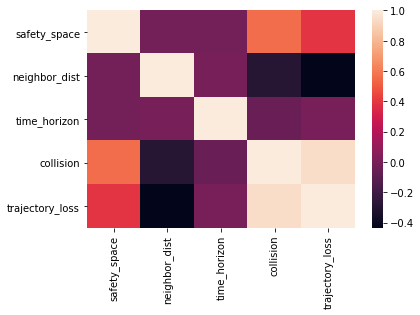

In [9]:
sns.heatmap(df.corr())

In [17]:
sns.set(font_scale=2)
plot = sns.heatmap(df.corr())
fig = plot.get_figure()
fig.set_size_inches(15, 10)
fig.savefig('corr.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [10]:
df_fil = df[(df['time_horizon'] > 5) &( df['neighbor_dist'] >5)]

In [11]:
df_fil.shape

(157, 6)

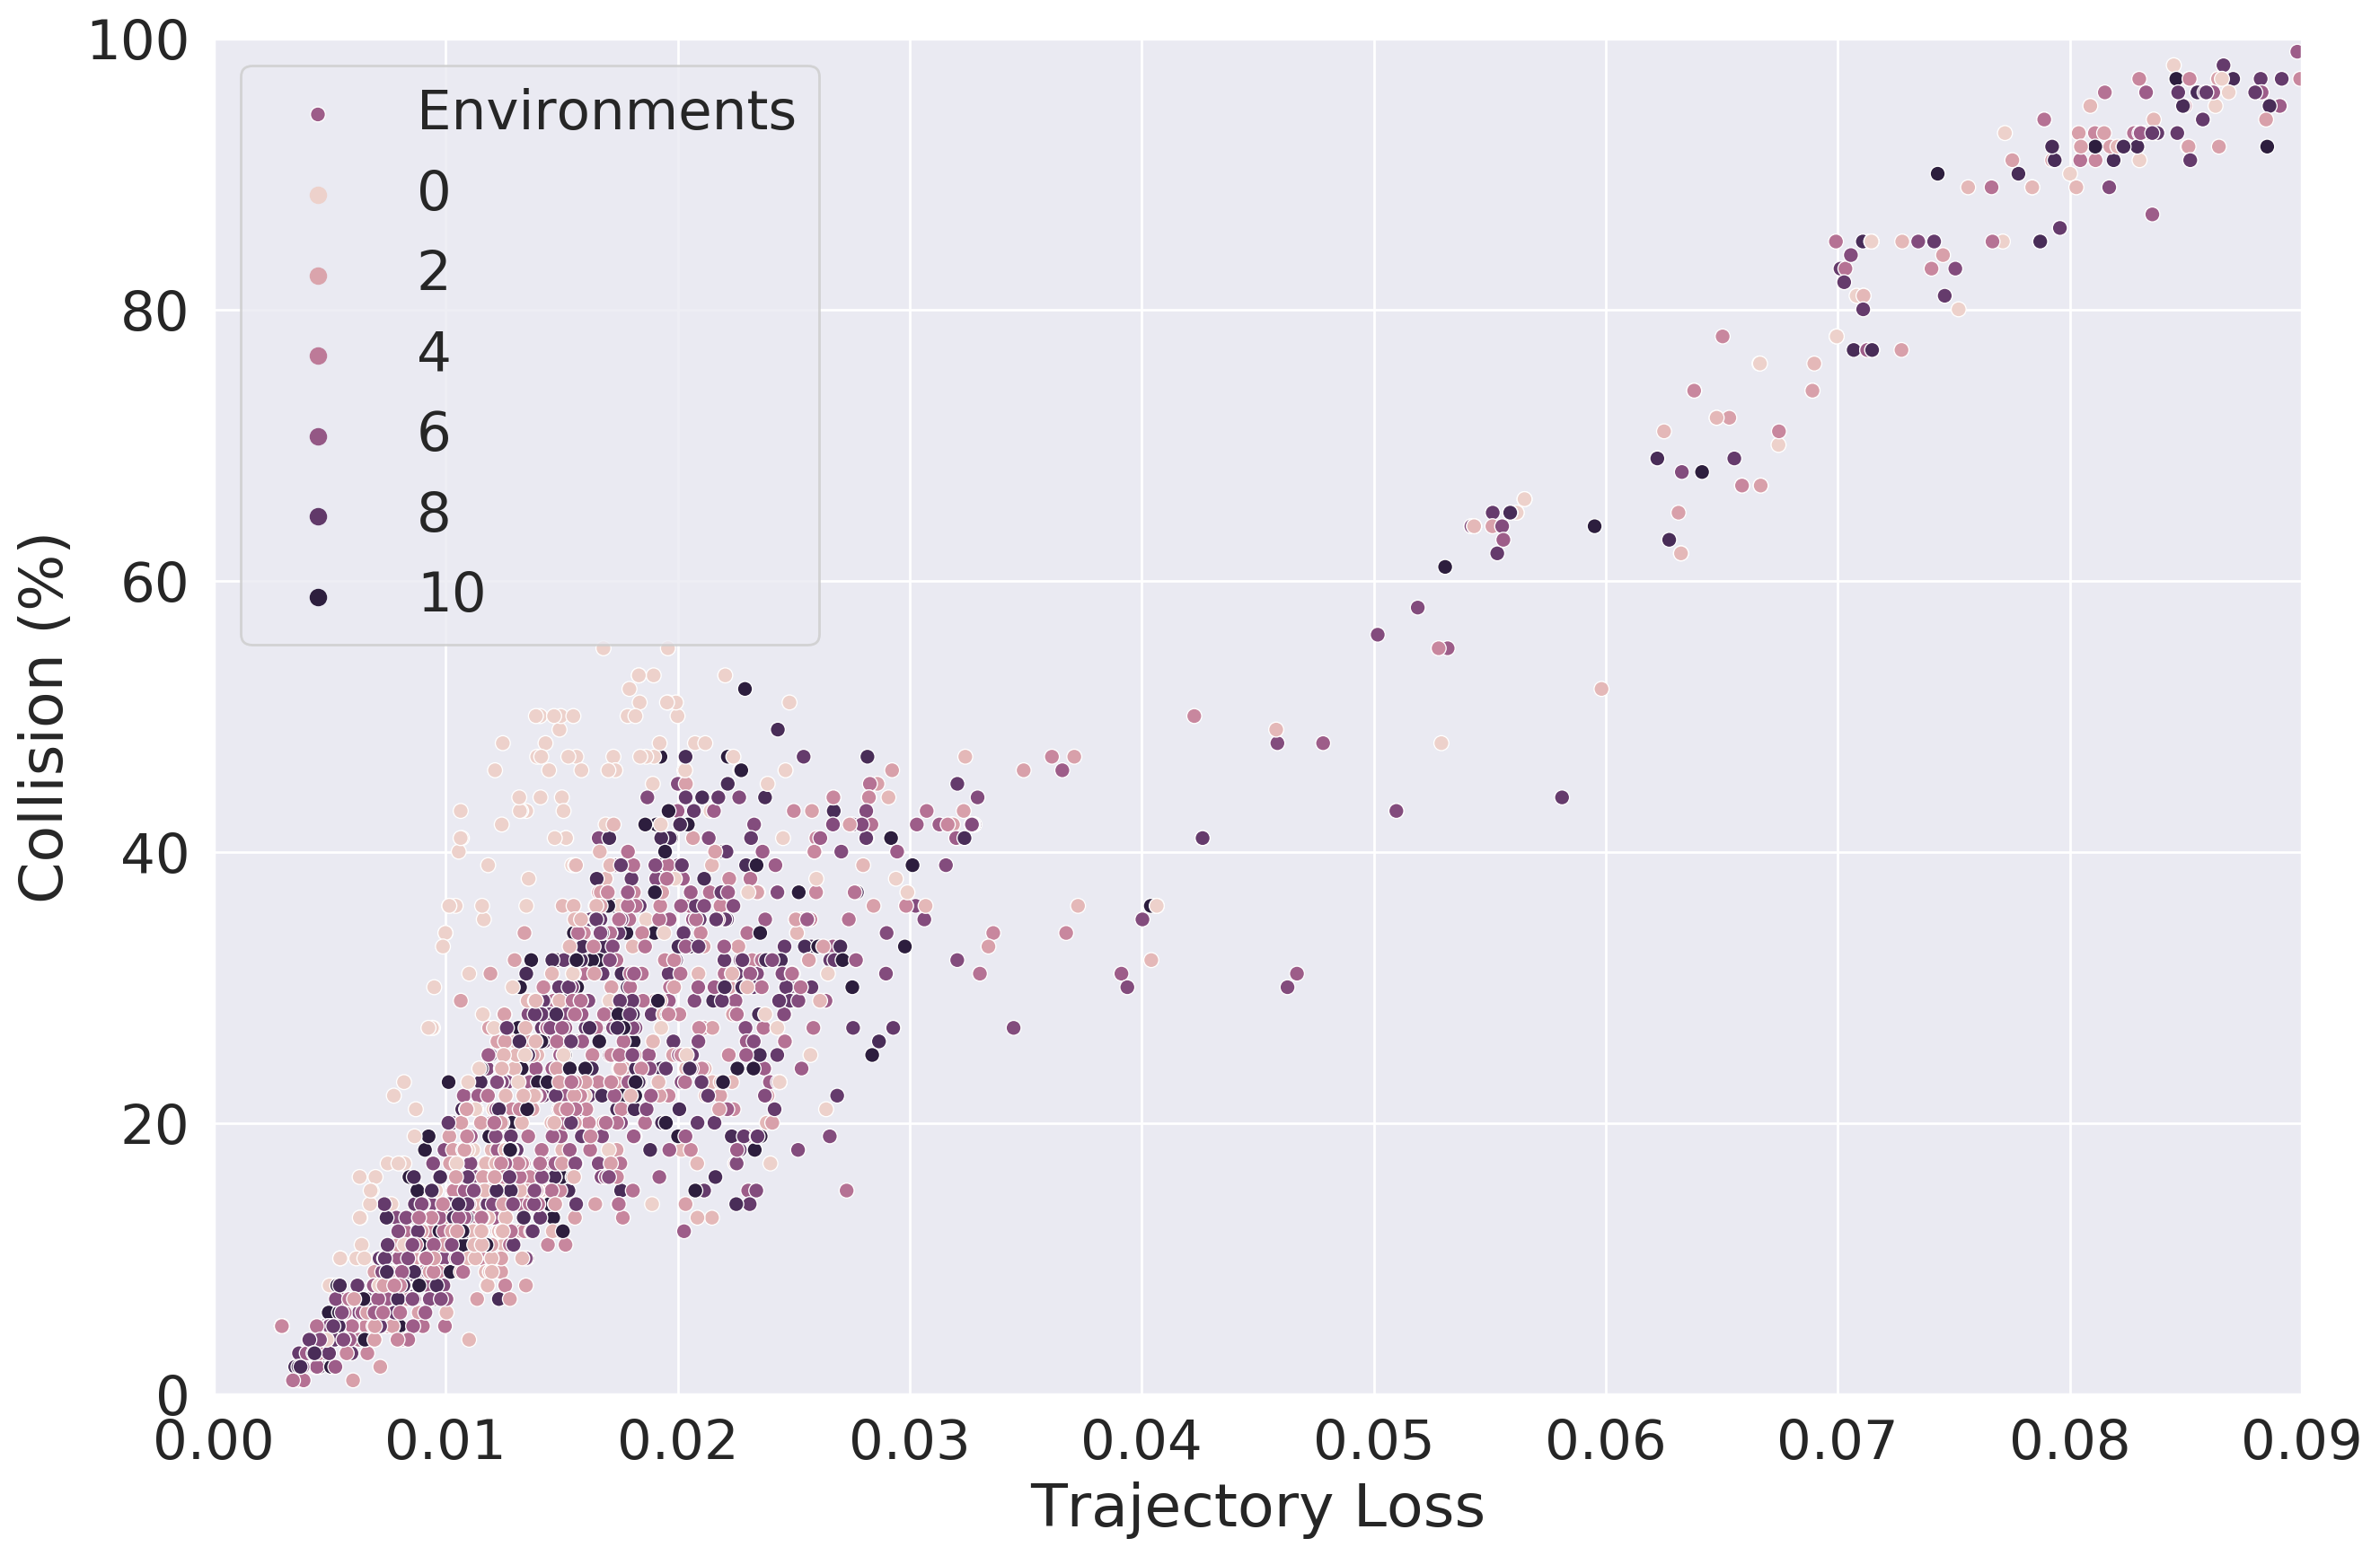

In [12]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plot = sns.scatterplot(
        data=df,
        x="trajectory_loss", y="collision", label="Environments", hue='time_horizon'
    )
plot.set(xlim=(0, 0.09), ylim=(0, 100), xlabel='Trajectory Loss', ylabel='Collision (%)')
plot.legend_.set_title('')
fig = plot.get_figure()
fig.set_size_inches(15, 10)
fig.set_dpi(200)
fig.savefig('corr.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

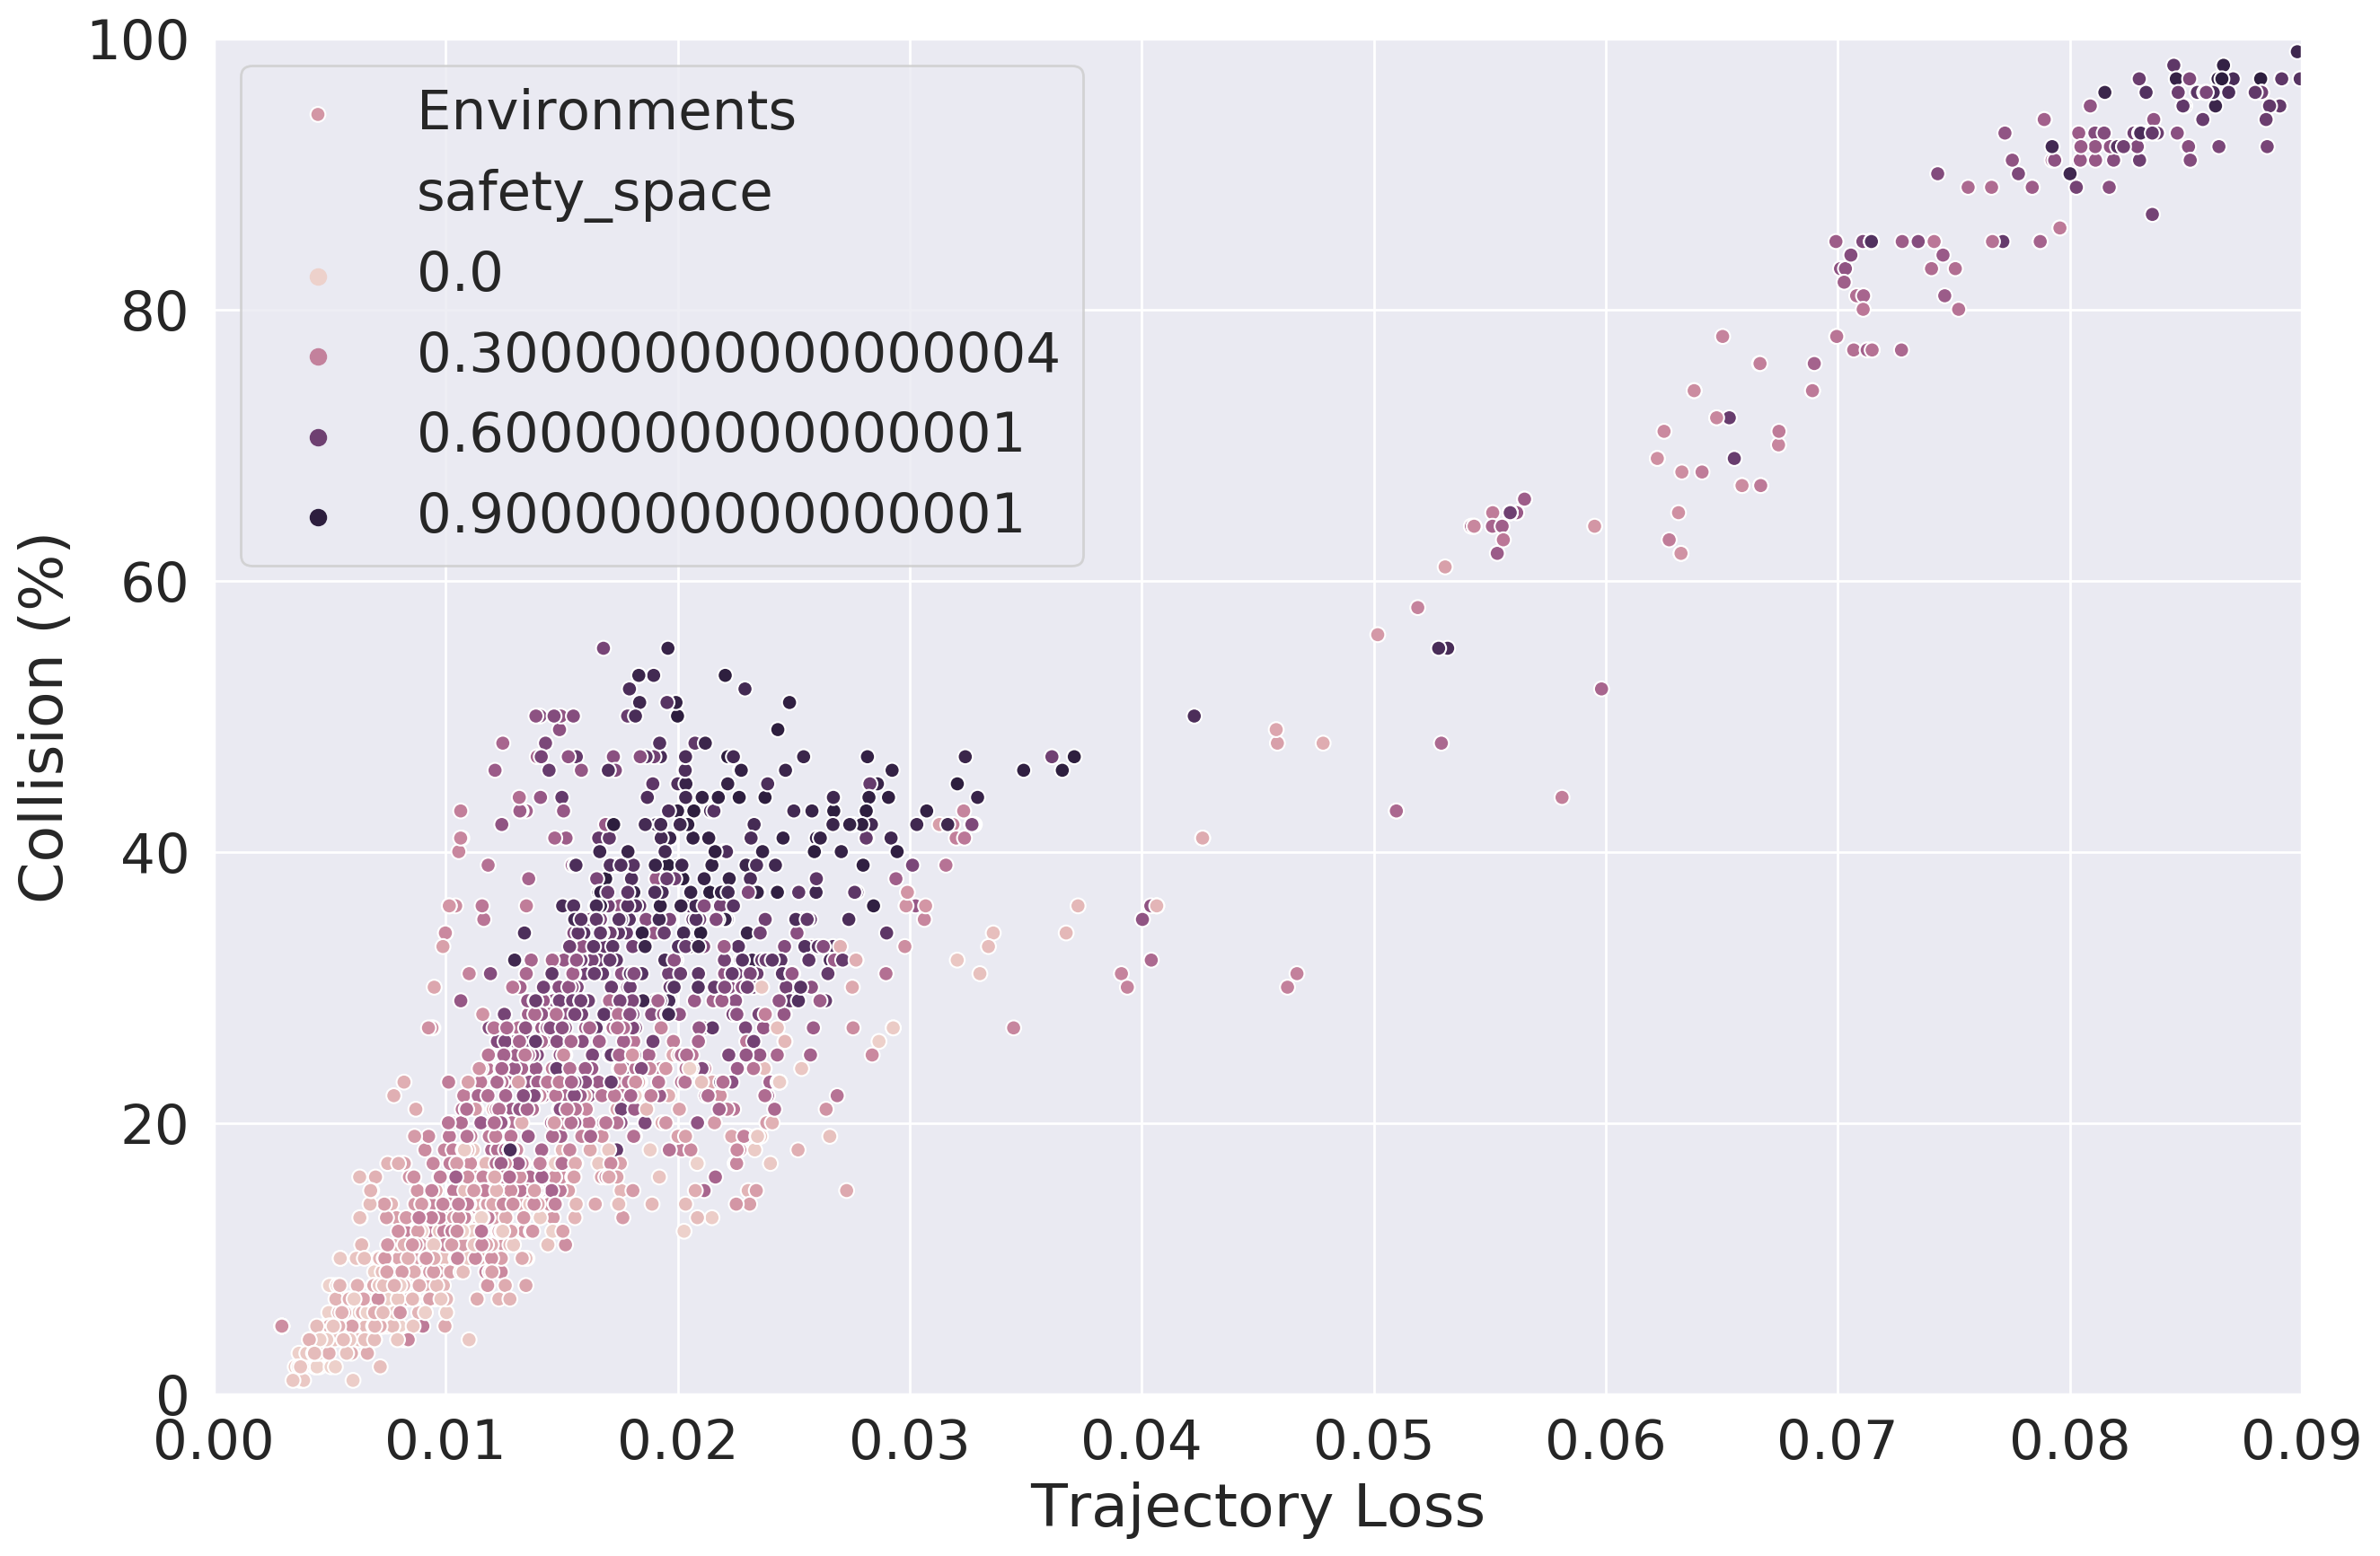

In [52]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plot = sns.scatterplot(
        data=df,
        x="trajectory_loss", y="collision", label="Environments", hue='safety_space'
    )
plot.set(xlim=(0, 0.09), ylim=(0, 100), xlabel='Trajectory Loss', ylabel='Collision (%)')
plot.legend_.set_title('')
fig = plot.get_figure()
fig.set_size_inches(15, 10)
fig.set_dpi(200)
fig.savefig('corr.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

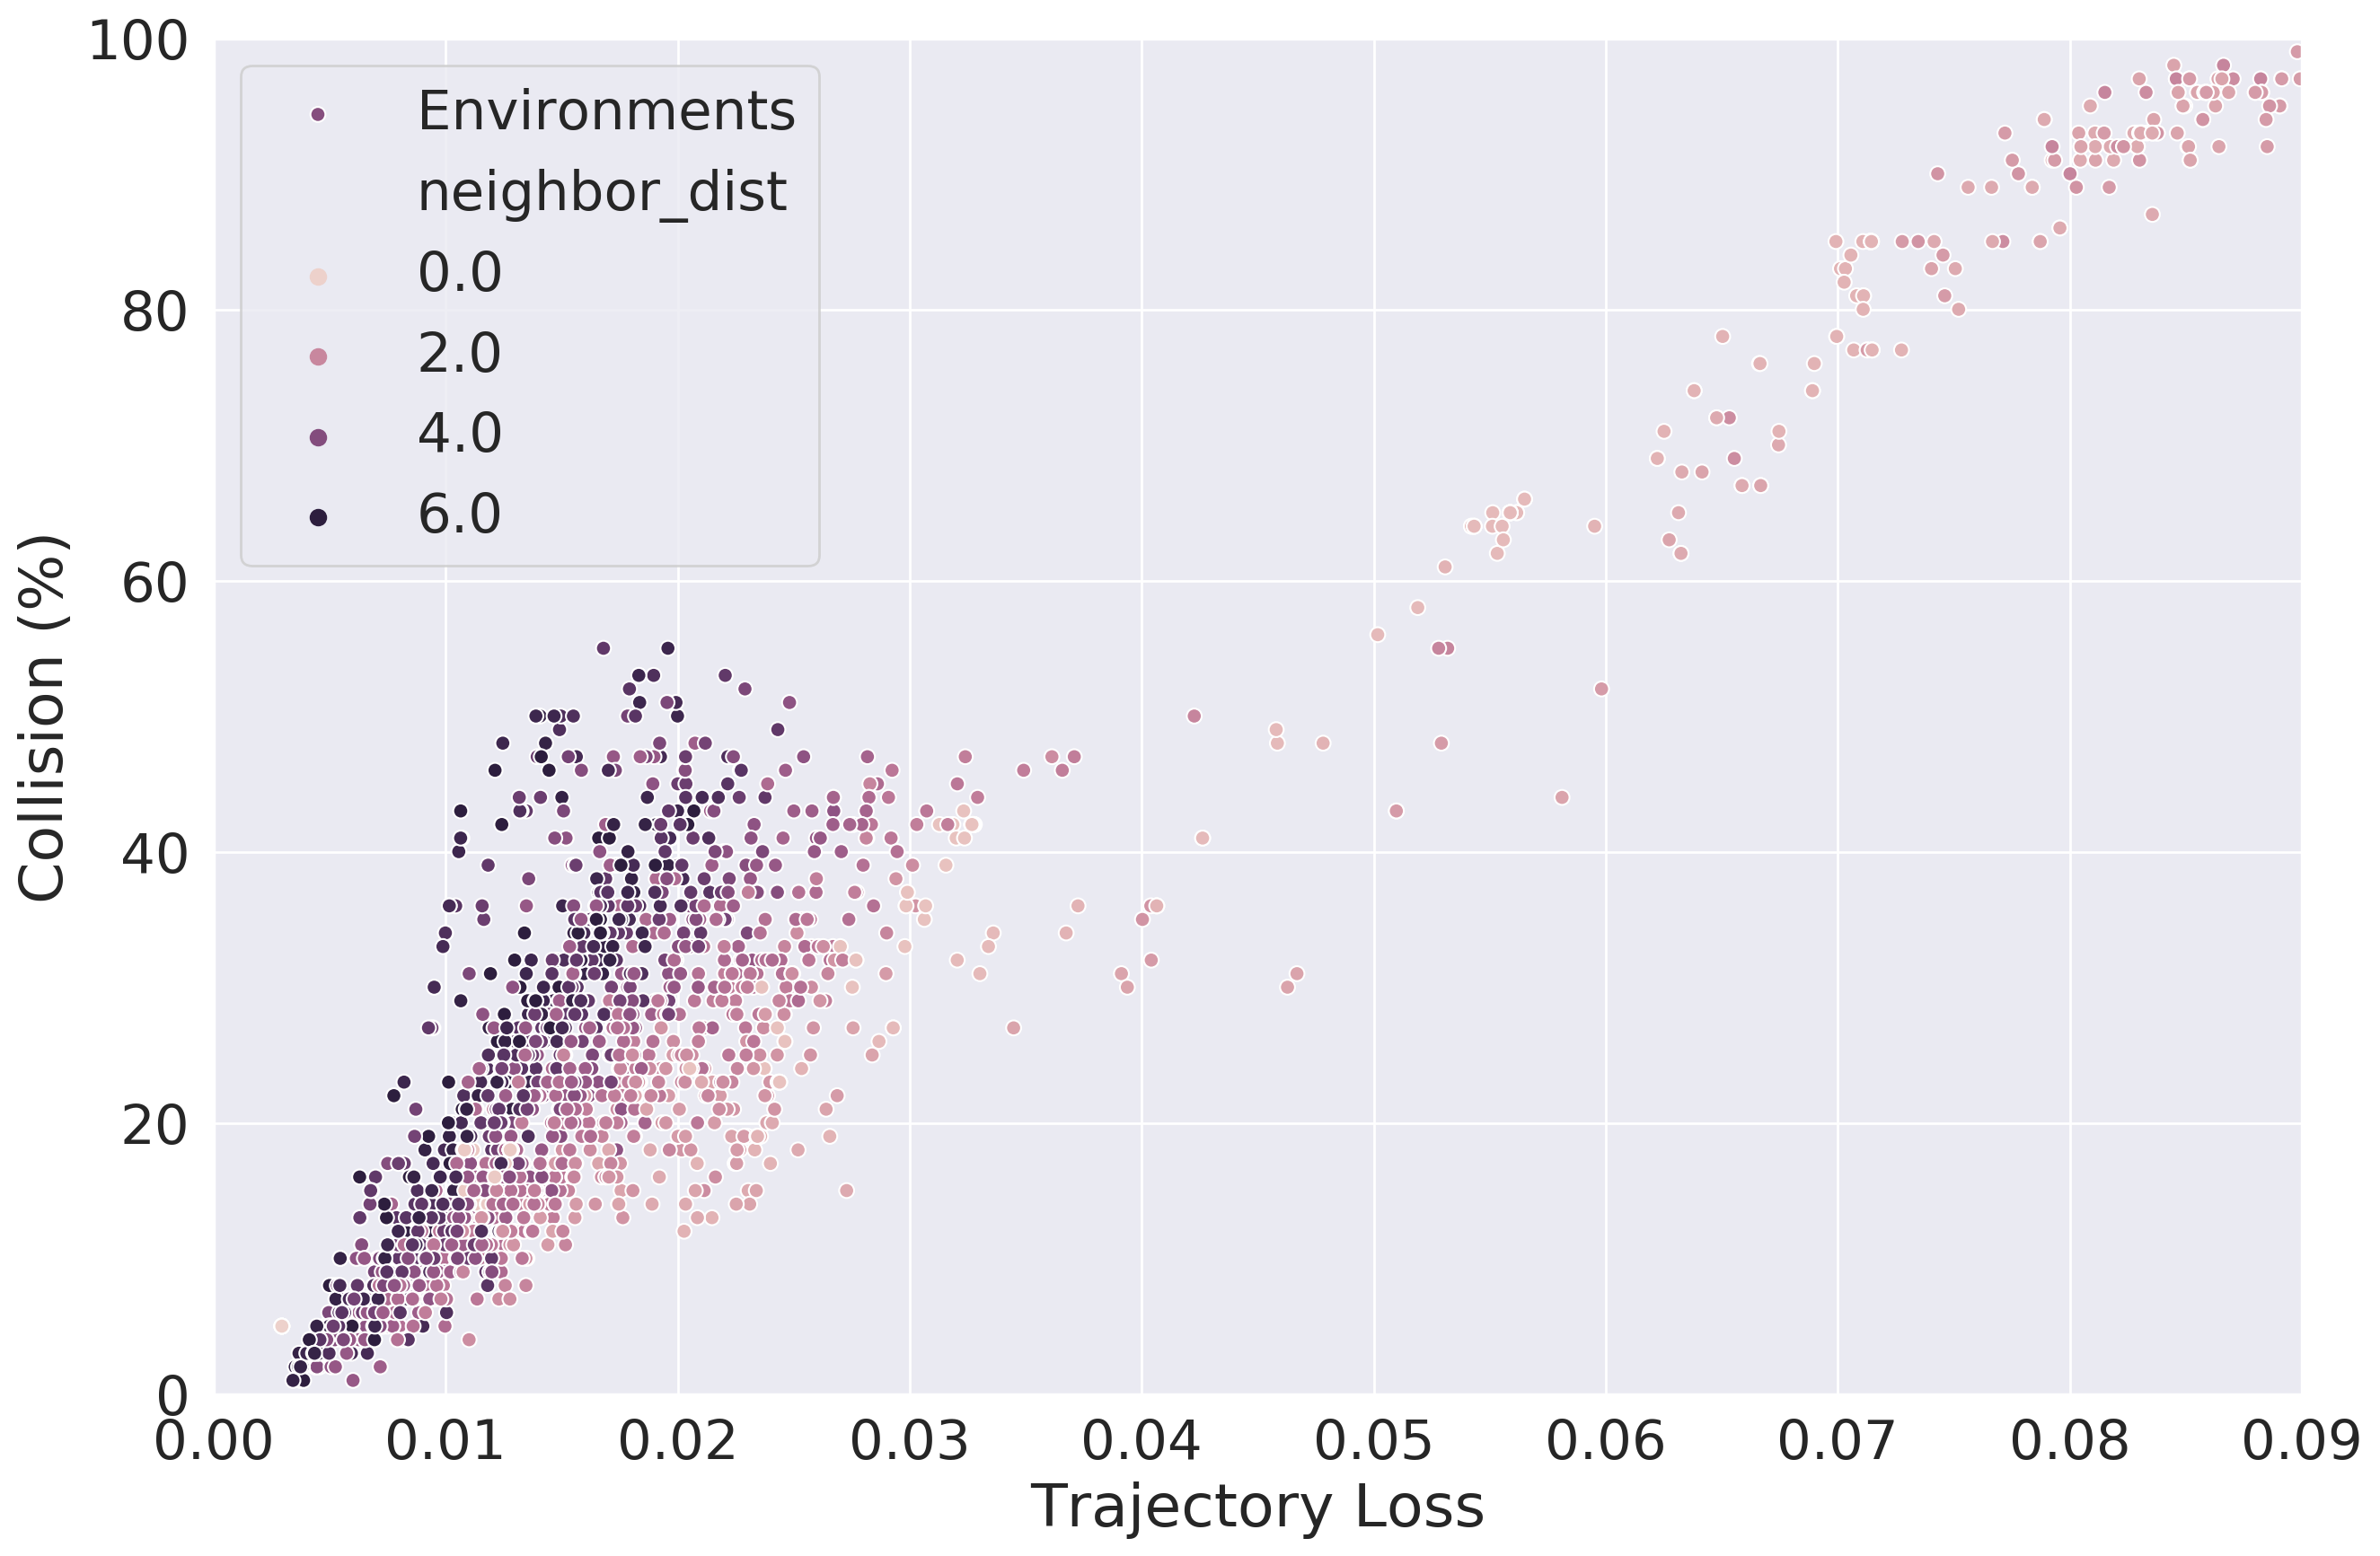

In [54]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plot = sns.scatterplot(
        data=df,
        x="trajectory_loss", y="collision", label="Environments", hue='neighbor_dist'
    )
plot.set(xlim=(0, 0.09), ylim=(0, 100), xlabel='Trajectory Loss', ylabel='Collision (%)')
plot.legend_.set_title('')
fig = plot.get_figure()
fig.set_size_inches(15, 10)
fig.set_dpi(200)
fig.savefig('corr.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [66]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
plot = sns.scatterplot(
        data=df,
        x="trajectory_loss", y="collision", label="Environments"
    )
plot = sns.scatterplot(
        data=df_fil,
        x="trajectory_loss", y="collision", label="Environments_f"
    )
plot.set(xlim=(0, 0.09), ylim=(0, 100), xlabel='Trajectory Loss', ylabel='Collision (%)')
plot.legend_.set_title('')
fig = plot.get_figure()
fig.set_size_inches(15, 10)
fig.set_dpi(200)
fig.savefig('corr.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [62]:
results = []
root = 'data/improvement/temp/'
env_dirs = os.listdir(root)
for env_dir in env_dirs :
    env_dir = os.path.join(root, env_dir)
    res = torch.load(os.path.join(env_dir, 'results.pth'))
    results.append(res)    

In [63]:
for res in results :
    res['last_epochs_res'] = {}
    for met in res['init_results'].keys() :
        avg = np.mean([r[1][met] for r in res['result_per_epoch']][-5:])
        res['last_epochs_res'][met] = avg

In [133]:
filtered_res = []
for res in results :
    if len(filtered_res) == 0 or (min(abs(r['init_results']['collision']-res['init_results']['collision']) for r in filtered_res)) > 1e-10 :
        filtered_res.append(res)

In [134]:
len(filtered_res)

29

In [135]:
results = filtered_res

In [136]:
traj_accuracy = [r['init_results']['traj accuracy'] for r in results]
collisions = np.asarray([1 - r['init_results']['success'] for r in results]) * 100
df = pd.DataFrame({'collision' : collisions, 'trajectory_loss' : traj_accuracy, 'name' : 'Environments'})

In [137]:
traj_accuracy_aft = [r['last_epochs_res']['traj accuracy'] for r in results]
collisions_aft = np.asarray([1 - r['last_epochs_res']['success'] for r in results]) * 100
df_aft = pd.DataFrame({'collision' : collisions_aft, 'trajectory_loss' : traj_accuracy_aft, 'name' : 'Environments'})

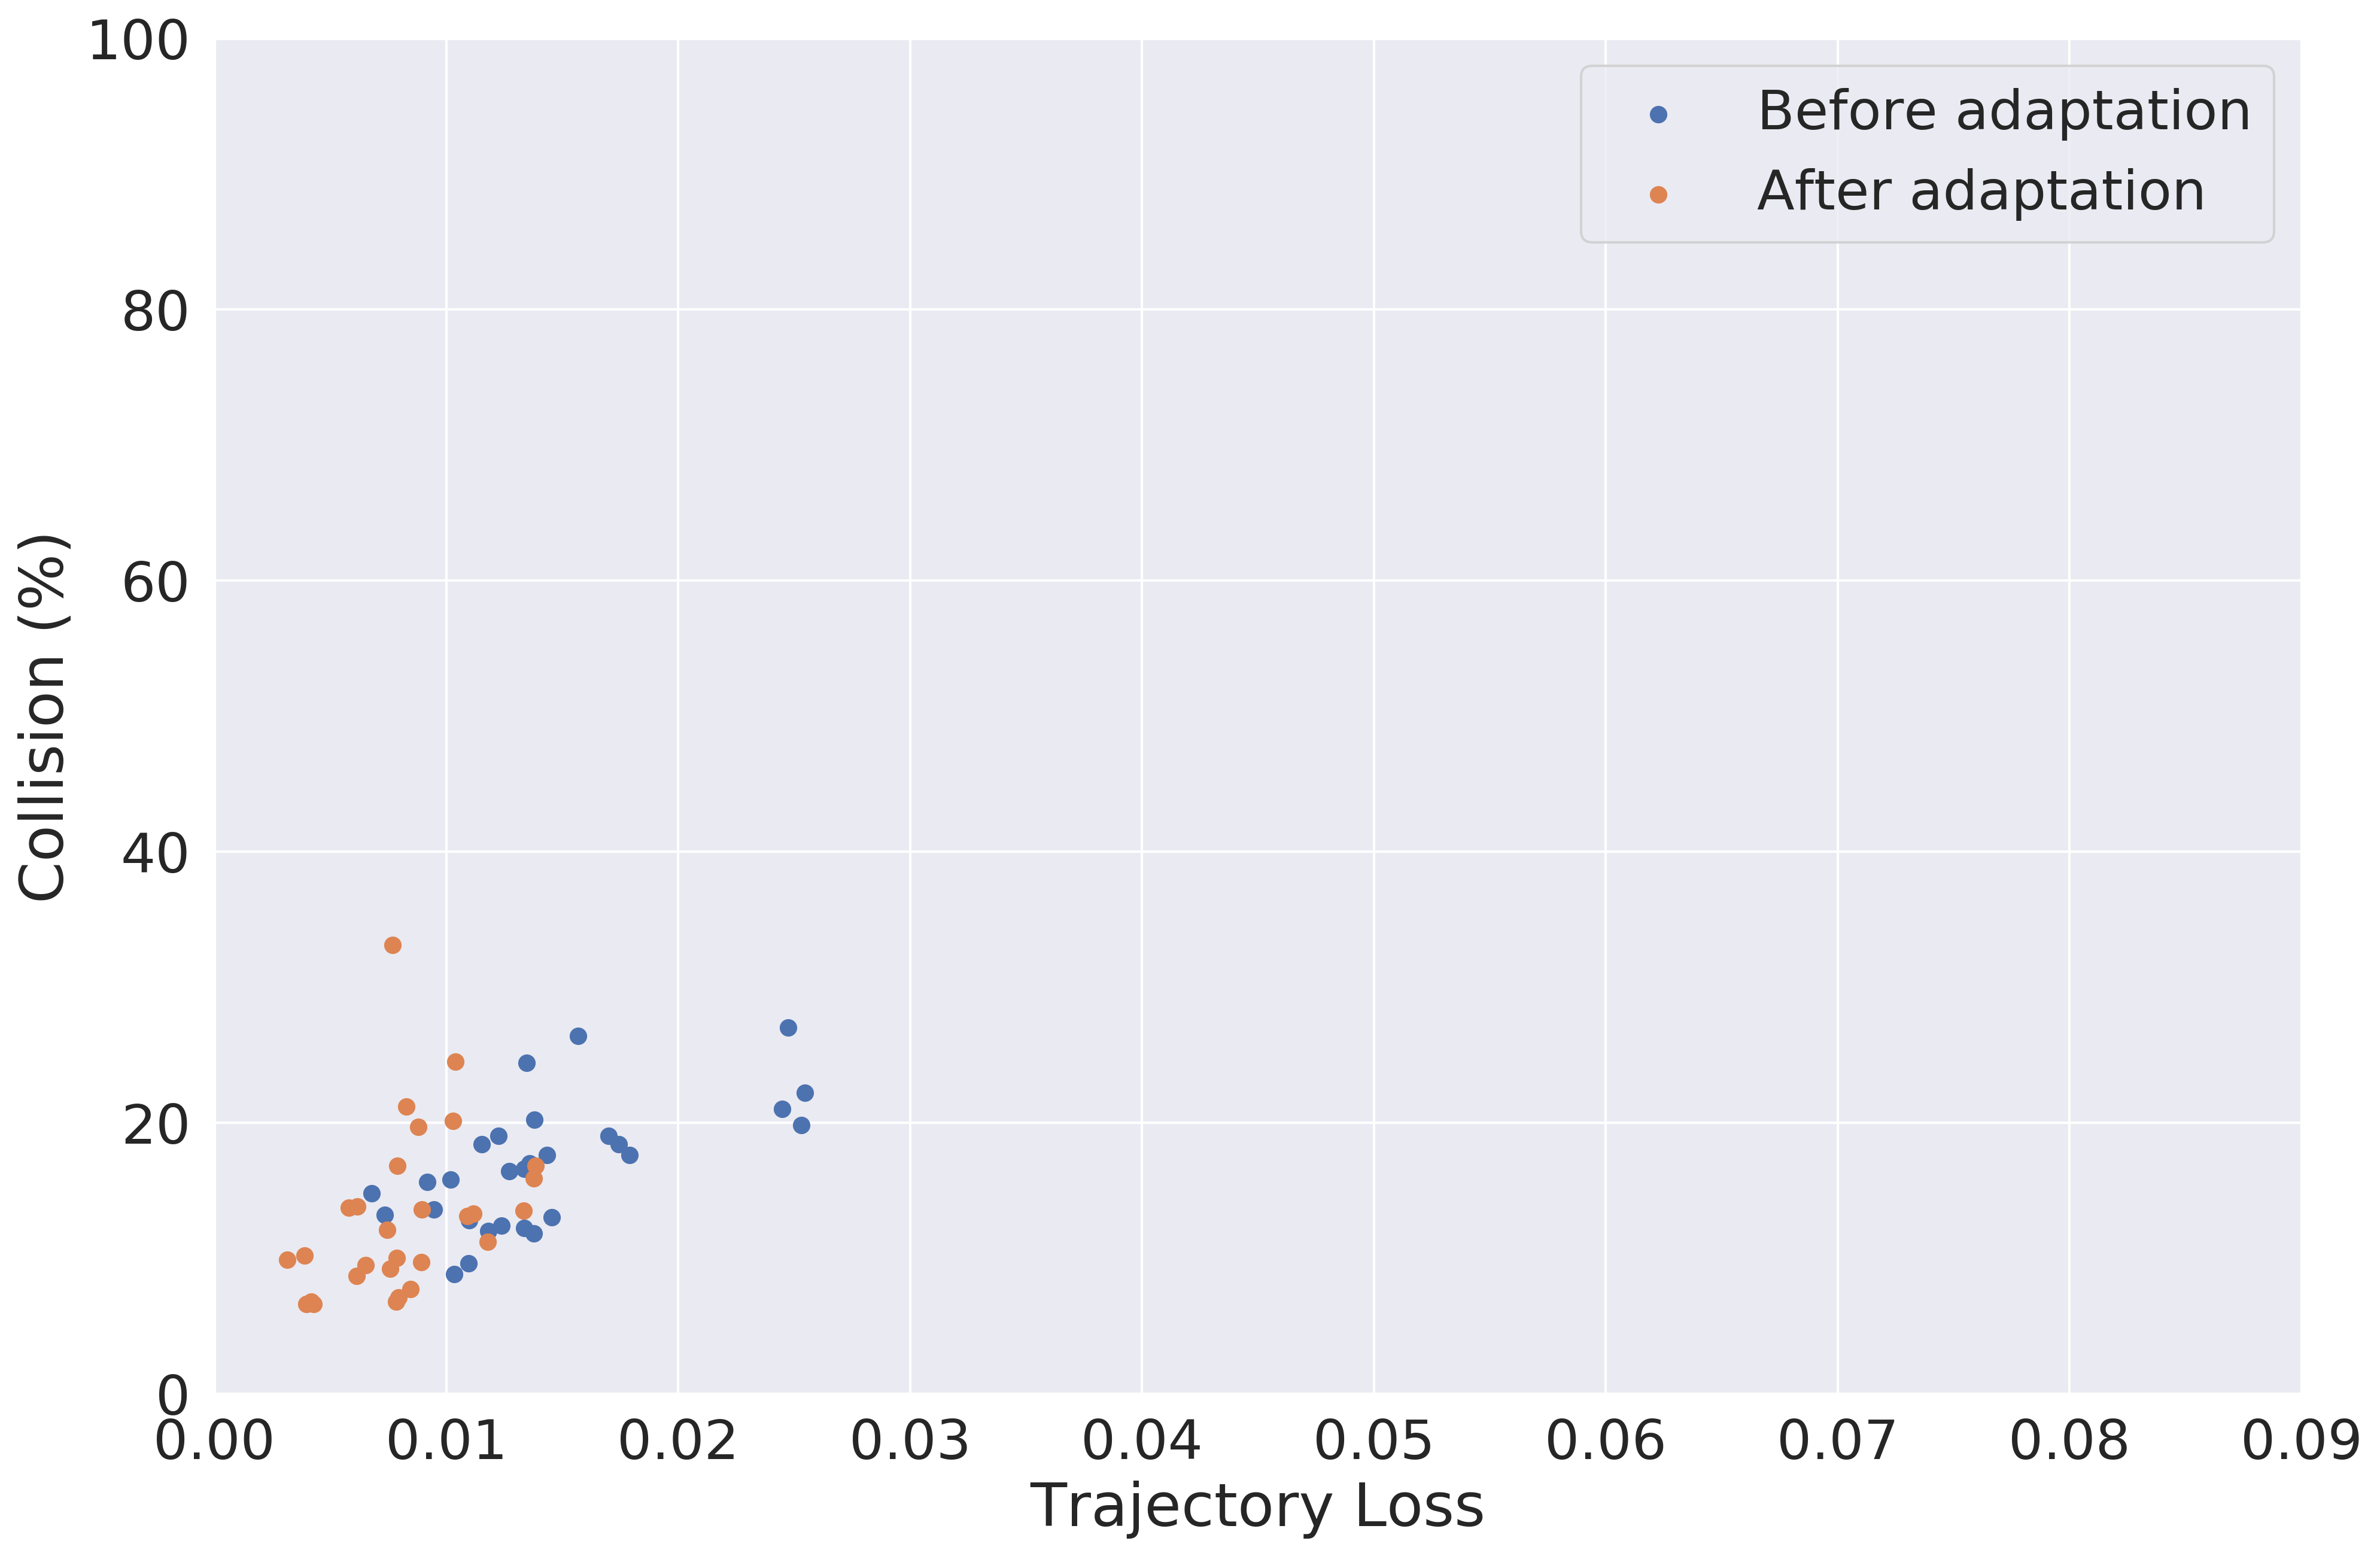

In [172]:
x, y = df['collision'].to_numpy(), df['trajectory_loss'].to_numpy()
dx, dy = df_aft['collision'].to_numpy()-x, df_aft['trajectory_loss'].to_numpy() - y

plt.figure(figsize=(15, 10), dpi=300)
plt.scatter(y, x, label='Before adaptation')
plt.scatter(y+dy, x+dx, label='After adaptation')
for i in range(len(x)) :
    plot.arrow(y[i], x[i], dy[i], dx[i],head_width=0.05, head_length=0.1, fc='k', ec='k')
    #sns.lineplot([0, 0.025], [0, 30])
    #sns.lineplot( [ y[i],y[i]+dy[i]], [x[i], x[i]+dx[i]], color='b')

#plt.xlim(0.002, 0.030)
plt.xlim(0, 0.09)

#plt.ylim(4, 35)
plt.ylim(0, 100)

plt.ylabel('Collision (%)')
plt.xlabel('Trajectory Loss')
plt.legend()
plt.savefig('adapt3.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

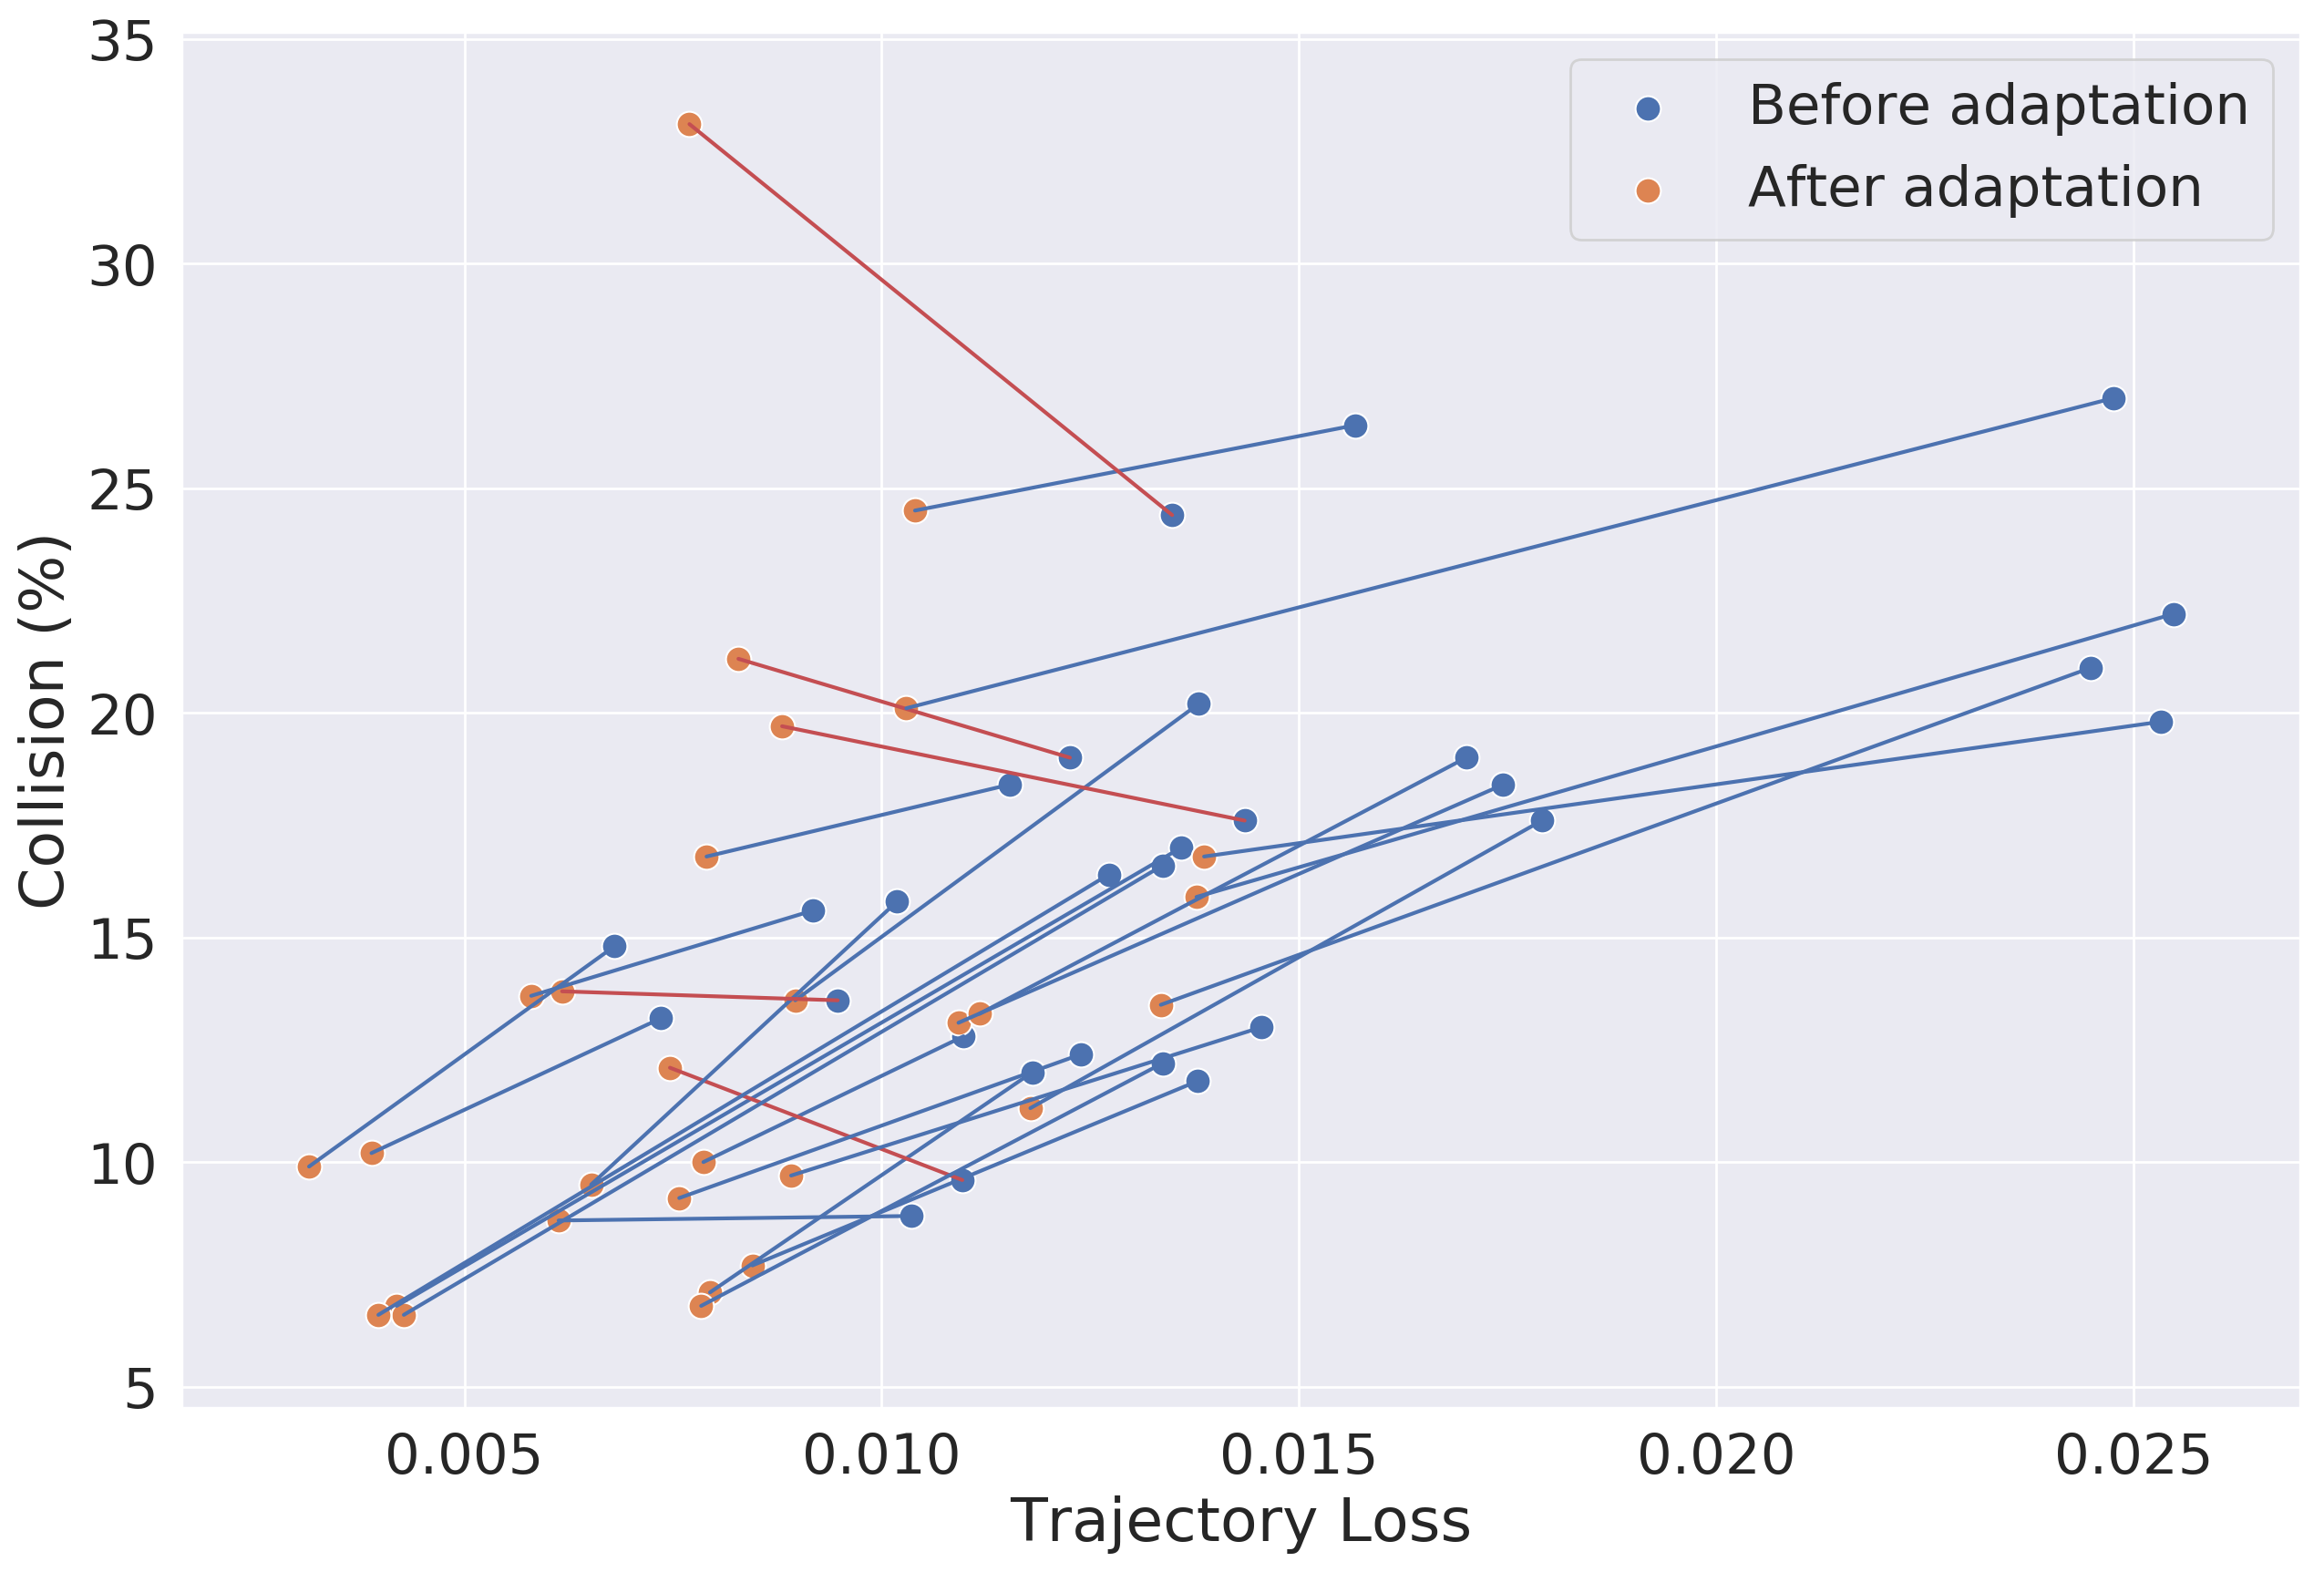

In [171]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
x, y = df['collision'].to_numpy(), df['trajectory_loss'].to_numpy()
dx, dy = df_aft['collision'].to_numpy()-x, df_aft['trajectory_loss'].to_numpy() - y

for i in range(len(x)) :
    #plot.arrow(x[i], y[i], dx[i], dy[i])
    #sns.lineplot([0, 0.025], [0, 30])
    color = 'b'
    if dx[i] > 0 :
        color = 'r'
    sns.lineplot( [ y[i],y[i]+dy[i]], [x[i], x[i]+dx[i]], color=color)
plot = sns.scatterplot(
        data=df,
        x="trajectory_loss", y="collision", label="Before adaptation",
        s=100
    )
plot = sns.scatterplot(
        data=df_aft,
        x="trajectory_loss", y="collision", label="After adaptation",
        s=100
    )

plot.set(xlabel='Trajectory Loss', ylabel='Collision (%)')
plot.legend_.set_title('')
fig = plot.get_figure()
fig.set_size_inches(15, 10)
fig.set_dpi(200)
plt.show()
fig.savefig('adapt2.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [2]:
import os 
import torch

In [7]:
os.listdir('../data/improvement/temp/')

['environement_30',
 'environement_5',
 'environement_39',
 'environement_28',
 'environement_11',
 'environement_20',
 'environement_18',
 'environement_12',
 'environement_23',
 'environement_32',
 'environement_6',
 'environement_9',
 'environement_38',
 'environement_27',
 'environement_13',
 'environement_21',
 'environement_31',
 'environement_16',
 'environement_35',
 'environement_36',
 'environement_25',
 'environement_15',
 'environement_29',
 'environement_37',
 'environement_2',
 'environement_34',
 'environement_24',
 'environement_33',
 'environement_22',
 'environement_14',
 'environement_7',
 'environement_1',
 'environement_3',
 'environement_17',
 'environement_8',
 'environement_0',
 'environement_26',
 'environement_19',
 'environement_4']

In [14]:
path = '../data/improvement/temp/environement_28/data.pth'

data = torch.load(path)

In [15]:
data['env_mods']

{'safety_space': 0.02595959595959596,
 'neighbor_dist': 4.9655172413793105,
 'time_horizon': 1.1111111111111112}